In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,KFold,StratifiedKFold
from sklearn.model_selection import LeaveOneOut,ShuffleSplit,GridSearchCV,RandomizedSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor

In [2]:
data = pd.read_csv(r"C:\Users\lohit\OneDrive\Teks academy\project dataset\Project 3\smartphones.csv")

In [3]:
df = data.drop(columns='model')

In [4]:
df.head()

,brand_name,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,...,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216
1,oneplus,19989,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,...,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,16499,75.0,True,False,False,exynos,8.0,2.4,5000.0,...,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,14999,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,...,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,24999,82.0,True,False,False,dimensity,8.0,2.6,5000.0,...,120,3,1.0,android,108.0,16.0,0,NaN,1080,2412


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   price                      980 non-null    int64  
 2   rating                     879 non-null    float64
 3   has_5g                     980 non-null    bool   
 4   has_nfc                    980 non-null    bool   
 5   has_ir_blaster             980 non-null    bool   
 6   processor_brand            960 non-null    object 
 7   num_cores                  974 non-null    float64
 8   processor_speed            938 non-null    float64
 9   battery_capacity           969 non-null    float64
 10  fast_charging_available    980 non-null    int64  
 11  fast_charging              769 non-null    float64
 12  ram_capacity               980 non-null    float64
 13  internal_memory            980 non-null    float64

In [6]:
def null_data(data):
    null_df = data.isna().sum().reset_index()
    null_df.columns = ['index','null_count']
    return null_df.sort_values(by='null_count',ascending=False)
    

In [7]:
null_data(df)

,index,null_count
22,extended_upto,480
11,fast_charging,211
2,rating,101
8,processor_speed,42
6,processor_brand,20
18,os,14
9,battery_capacity,11
7,num_cores,6
20,primary_camera_front,5
17,num_front_cameras,4


In [8]:
df.iloc[:,-4:]

,extended_memory_available,extended_upto,resolution_width,resolution_height
0,0,NaN,1440,3216
1,1,1024.0,1080,2412
2,1,1024.0,1080,2408
3,1,1024.0,1080,2400
4,0,NaN,1080,2412
...,...,...,...,...
975,0,NaN,1080,2460
976,1,1024.0,720,1600
977,0,NaN,1080,2460
978,1,1024.0,1080,2400


##### 'extended upto' column null value filling

In [9]:
df[df['extended_upto'].isna() == True][['extended_memory_available','extended_upto']].value_counts()

Series([], Name: count, dtype: int64)

In [10]:
df[['extended_memory_available','extended_upto']].value_counts()

extended_memory_available  extended_upto
1                          1024.0           263
                           512.0            116
                           256.0            100
                           128.0              9
                           2048.0             6
                           32.0               3
                           64.0               3
Name: count, dtype: int64

In [11]:
df['extended_upto'].fillna(0,inplace=True)

In [12]:
null_data(df)

,index,null_count
11,fast_charging,211
2,rating,101
8,processor_speed,42
6,processor_brand,20
18,os,14
9,battery_capacity,11
7,num_cores,6
20,primary_camera_front,5
17,num_front_cameras,4
0,brand_name,0


##### 'Fast charging' columns null value filling

In [13]:
df.iloc[:,:12]

,brand_name,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging
0,oneplus,54999,89.0,True,True,False,snapdragon,8.0,3.20,5000.0,1,100.0
1,oneplus,19989,81.0,True,False,False,snapdragon,8.0,2.20,5000.0,1,33.0
2,samsung,16499,75.0,True,False,False,exynos,8.0,2.40,5000.0,1,15.0
3,motorola,14999,81.0,True,False,False,snapdragon,8.0,2.20,5000.0,1,NaN
4,realme,24999,82.0,True,False,False,dimensity,8.0,2.60,5000.0,1,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...
975,motorola,34990,83.0,True,False,False,snapdragon,8.0,3.00,5000.0,1,68.0
976,honor,14990,75.0,True,False,False,snapdragon,8.0,2.20,5000.0,1,22.0
977,poco,28990,85.0,True,True,True,dimensity,8.0,2.85,5080.0,1,67.0
978,motorola,19990,80.0,True,True,False,snapdragon,8.0,2.20,5000.0,1,NaN


In [14]:
df.columns

Index(['brand_name', 'price', 'rating', 'has_5g', 'has_nfc', 'has_ir_blaster',
       'processor_brand', 'num_cores', 'processor_speed', 'battery_capacity',
       'fast_charging_available', 'fast_charging', 'ram_capacity',
       'internal_memory', 'screen_size', 'refresh_rate', 'num_rear_cameras',
       'num_front_cameras', 'os', 'primary_camera_rear',
       'primary_camera_front', 'extended_memory_available', 'extended_upto',
       'resolution_width', 'resolution_height'],
      dtype='object')

In [15]:
df['fast_charging_available'].value_counts()

fast_charging_available
1    837
0    143
Name: count, dtype: int64

In [16]:
df[df['fast_charging_available']==0]['fast_charging'].fillna(0,inplace=True)

C:\Users\lohit\AppData\Local\Temp\ipykernel_27300\2359985889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['fast_charging_available']==0]['fast_charging'].fillna(0,inplace=True)


In [17]:
null_data(df)

,index,null_count
11,fast_charging,211
2,rating,101
8,processor_speed,42
6,processor_brand,20
18,os,14
9,battery_capacity,11
7,num_cores,6
20,primary_camera_front,5
17,num_front_cameras,4
0,brand_name,0


In [18]:
df['fast_charging'] = df.groupby(['fast_charging_available','brand_name'])['fast_charging'].transform(lambda x: x.fillna(x.mean()))

In [19]:

df['fast_charging'].fillna(0,inplace=True)

In [20]:
null_data(df).head()

,index,null_count
2,rating,101
8,processor_speed,42
6,processor_brand,20
18,os,14
9,battery_capacity,11


##### 'rating' column null value filling

In [21]:
df.columns

Index(['brand_name', 'price', 'rating', 'has_5g', 'has_nfc', 'has_ir_blaster',
       'processor_brand', 'num_cores', 'processor_speed', 'battery_capacity',
       'fast_charging_available', 'fast_charging', 'ram_capacity',
       'internal_memory', 'screen_size', 'refresh_rate', 'num_rear_cameras',
       'num_front_cameras', 'os', 'primary_camera_rear',
       'primary_camera_front', 'extended_memory_available', 'extended_upto',
       'resolution_width', 'resolution_height'],
      dtype='object')

In [22]:
df.select_dtypes(include='number').corr()

,price,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
price,1.000000,0.283504,-0.048561,0.474049,-0.159232,0.116739,0.178523,0.386002,0.557168,0.113253,0.244115,0.125330,0.115228,0.092095,0.162995,-0.448628,-0.272838,0.340592,0.353578
rating,0.283504,1.000000,0.199741,0.628446,-0.015581,0.542814,0.587639,0.757613,0.481070,0.298272,0.610795,0.515531,0.131480,0.562046,0.577861,-0.415265,-0.142489,0.432582,0.688108
num_cores,-0.048561,0.199741,1.000000,0.192863,0.241289,0.360476,0.250348,0.303911,0.043934,0.385652,0.233010,0.343150,0.047578,0.312394,0.221483,0.072934,0.145416,0.137952,0.266491
processor_speed,0.474049,0.628446,0.192863,1.000000,-0.041930,0.345856,0.581344,0.627234,0.525510,0.290366,0.555004,0.255476,0.124191,0.281204,0.398207,-0.663085,-0.368729,0.365757,0.553923
battery_capacity,-0.159232,-0.015581,0.241289,-0.041930,1.000000,0.128993,0.026575,0.085690,-0.001444,0.348805,0.088636,0.155410,-0.072366,0.171465,-0.005111,0.174683,0.217443,-0.024607,0.036503
fast_charging_available,0.116739,0.542814,0.360476,0.345856,0.128993,1.000000,0.454685,0.439538,0.279877,0.346687,0.415278,0.470952,0.072208,0.427440,0.331769,-0.166626,0.049404,0.318720,0.510112
fast_charging,0.178523,0.587639,0.250348,0.581344,0.026575,0.454685,1.000000,0.604305,0.334402,0.315447,0.601513,0.313605,0.050223,0.512273,0.474739,-0.494479,-0.271279,0.306585,0.437285
ram_capacity,0.386002,0.757613,0.303911,0.627234,0.085690,0.439538,0.604305,1.000000,0.592332,0.396613,0.573977,0.384908,0.167176,0.431377,0.519891,-0.482666,-0.229046,0.380274,0.578105
internal_memory,0.557168,0.481070,0.043934,0.525510,-0.001444,0.279877,0.334402,0.592332,1.000000,0.276401,0.380263,0.236609,0.154839,0.200656,0.256869,-0.397903,-0.214041,0.341709,0.427218
screen_size,0.113253,0.298272,0.385652,0.290366,0.348805,0.346687,0.315447,0.396613,0.276401,1.000000,0.333411,0.371769,0.076910,0.329288,0.214725,-0.094878,0.040320,0.334099,0.295926


In [23]:
df['rating'].corr(df['ram_capacity'])

0.7576131519648827

##### rating column has highest correlation with ram capacity

In [24]:
df['ram_capacity'].value_counts()

ram_capacity
8.0     339
6.0     234
4.0     217
12.0     86
3.0      54
2.0      32
16.0      9
1.0       7
18.0      2
Name: count, dtype: int64

In [25]:
df['rating'] = df.groupby(['ram_capacity'])['rating'].transform(lambda x: x.fillna(x.mean()))

In [26]:
null_data(df).head(7)

,index,null_count
8,processor_speed,42
6,processor_brand,20
18,os,14
9,battery_capacity,11
2,rating,7
7,num_cores,6
20,primary_camera_front,5


##### still 7 null vallues left for 'rating' column - so filling those based on second highest corr column i.e processor speed

In [27]:
df[df['rating'].isna() == True]

,brand_name,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
396,itel,6490,NaN,False,False,False,spreadtrum,4.0,1.3,5000.0,...,60,2,1.0,android,8.0,8.0,0,0.0,1600,720
472,vivo,7499,NaN,False,False,False,helio,4.0,1.3,1900.0,...,60,1,1.0,android,5.0,2.0,1,128.0,480,854
713,tecno,6999,NaN,False,False,False,spreadtrum,4.0,1.3,4000.0,...,60,2,1.0,android,5.0,5.0,1,0.0,720,1520
722,itel,5990,NaN,False,False,False,unisoc,4.0,1.3,4000.0,...,60,3,1.0,android,8.0,8.0,1,32.0,1600,720
769,itel,5490,NaN,False,False,False,NaN,4.0,1.3,4000.0,...,60,2,1.0,android,8.0,5.0,1,32.0,720,1600
827,samsung,4999,NaN,False,False,False,mediatek,4.0,1.5,3000.0,...,60,1,1.0,android,8.0,5.0,1,0.0,720,1480
874,itel,3999,NaN,False,False,False,spreadtrum,4.0,1.4,2400.0,...,60,1,1.0,android,5.0,2.0,0,0.0,854,480


In [28]:
df['processor_speed'].value_counts()

processor_speed
2.00    146
2.20    135
2.40    128
3.20     94
2.30     86
3.00     53
2.84     36
2.05     28
2.50     23
1.80     23
1.60     20
2.85     19
3.22     18
3.10     15
2.60     14
2.90     13
1.30     10
1.82     10
2.73      9
2.80      9
3.05      8
2.36      8
1.40      5
2.65      5
2.70      5
1.50      4
2.96      3
2.86      3
3.13      2
2.35      1
2.37      1
1.99      1
1.95      1
2.10      1
1.20      1
Name: count, dtype: int64

In [29]:
df['rating'].fillna(df['rating'].mean(),inplace=True)

In [30]:
df.rating = df.rating.astype('int')

In [31]:
null_data(df).head(7)

,index,null_count
8,processor_speed,42
6,processor_brand,20
18,os,14
9,battery_capacity,11
7,num_cores,6
20,primary_camera_front,5
17,num_front_cameras,4


In [32]:
df.select_dtypes(include='number').corr()

,price,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
price,1.000000,0.347465,-0.048561,0.474049,-0.159232,0.116739,0.178523,0.386002,0.557168,0.113253,0.244115,0.125330,0.115228,0.092095,0.162995,-0.448628,-0.272838,0.340592,0.353578
rating,0.347465,1.000000,0.305388,0.661795,0.043951,0.580252,0.604468,0.771321,0.512238,0.358637,0.633670,0.572261,0.147836,0.560119,0.585847,-0.428638,-0.147174,0.460875,0.701762
num_cores,-0.048561,0.305388,1.000000,0.192863,0.241289,0.360476,0.250348,0.303911,0.043934,0.385652,0.233010,0.343150,0.047578,0.312394,0.221483,0.072934,0.145416,0.137952,0.266491
processor_speed,0.474049,0.661795,0.192863,1.000000,-0.041930,0.345856,0.581344,0.627234,0.525510,0.290366,0.555004,0.255476,0.124191,0.281204,0.398207,-0.663085,-0.368729,0.365757,0.553923
battery_capacity,-0.159232,0.043951,0.241289,-0.041930,1.000000,0.128993,0.026575,0.085690,-0.001444,0.348805,0.088636,0.155410,-0.072366,0.171465,-0.005111,0.174683,0.217443,-0.024607,0.036503
fast_charging_available,0.116739,0.580252,0.360476,0.345856,0.128993,1.000000,0.454685,0.439538,0.279877,0.346687,0.415278,0.470952,0.072208,0.427440,0.331769,-0.166626,0.049404,0.318720,0.510112
fast_charging,0.178523,0.604468,0.250348,0.581344,0.026575,0.454685,1.000000,0.604305,0.334402,0.315447,0.601513,0.313605,0.050223,0.512273,0.474739,-0.494479,-0.271279,0.306585,0.437285
ram_capacity,0.386002,0.771321,0.303911,0.627234,0.085690,0.439538,0.604305,1.000000,0.592332,0.396613,0.573977,0.384908,0.167176,0.431377,0.519891,-0.482666,-0.229046,0.380274,0.578105
internal_memory,0.557168,0.512238,0.043934,0.525510,-0.001444,0.279877,0.334402,0.592332,1.000000,0.276401,0.380263,0.236609,0.154839,0.200656,0.256869,-0.397903,-0.214041,0.341709,0.427218
screen_size,0.113253,0.358637,0.385652,0.290366,0.348805,0.346687,0.315447,0.396613,0.276401,1.000000,0.333411,0.371769,0.076910,0.329288,0.214725,-0.094878,0.040320,0.334099,0.295926


In [33]:
df['processor_brand'] = df.groupby(['brand_name'])['processor_brand'].bfill()

In [34]:
df['processor_brand'] = df.groupby(['brand_name'])['processor_brand'].ffill()

In [35]:
df['processor_brand'].fillna('snapdragon',inplace=True)

In [36]:
null_data(df).head(7)

,index,null_count
8,processor_speed,42
18,os,14
9,battery_capacity,11
7,num_cores,6
20,primary_camera_front,5
17,num_front_cameras,4
0,brand_name,0


In [37]:
df['processor_speed'] = df.groupby(['rating'])['processor_speed'].bfill()

In [38]:
df['processor_speed'] = df.groupby(['rating'])['processor_speed'].ffill()

In [39]:
null_data(df).head()

,index,null_count
18,os,14
9,battery_capacity,11
7,num_cores,6
20,primary_camera_front,5
17,num_front_cameras,4


In [40]:
df['os'] = df.groupby(['brand_name'])['os'].bfill().ffill()

In [41]:
null_data(df).head()

,index,null_count
9,battery_capacity,11
7,num_cores,6
20,primary_camera_front,5
17,num_front_cameras,4
0,brand_name,0


In [42]:
df['battery_capacity']= df.groupby(['screen_size'])['battery_capacity'].bfill().ffill()

In [43]:
null_data(df).head()

,index,null_count
7,num_cores,6
20,primary_camera_front,5
17,num_front_cameras,4
0,brand_name,0
13,internal_memory,0


In [44]:
null_cols = ['num_cores','primary_camera_front','num_front_cameras']

In [45]:
for i in null_cols:
    df[i].fillna(int(df[i].mean()),inplace=True)

#### Data Exploration

In [46]:
df.head()

,brand_name,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,54999,89,True,True,False,snapdragon,8.0,3.2,5000.0,...,120,3,1.0,android,50.0,16.0,0,0.0,1440,3216
1,oneplus,19989,81,True,False,False,snapdragon,8.0,2.2,5000.0,...,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,16499,75,True,False,False,exynos,8.0,2.4,5000.0,...,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,14999,81,True,False,False,snapdragon,8.0,2.2,5000.0,...,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,24999,82,True,False,False,dimensity,8.0,2.6,5000.0,...,120,3,1.0,android,108.0,16.0,0,0.0,1080,2412


In [47]:
df.columns

Index(['brand_name', 'price', 'rating', 'has_5g', 'has_nfc', 'has_ir_blaster',
       'processor_brand', 'num_cores', 'processor_speed', 'battery_capacity',
       'fast_charging_available', 'fast_charging', 'ram_capacity',
       'internal_memory', 'screen_size', 'refresh_rate', 'num_rear_cameras',
       'num_front_cameras', 'os', 'primary_camera_rear',
       'primary_camera_front', 'extended_memory_available', 'extended_upto',
       'resolution_width', 'resolution_height'],
      dtype='object')

In [65]:
df['fast_charging'] = np.round(df['fast_charging'],1)

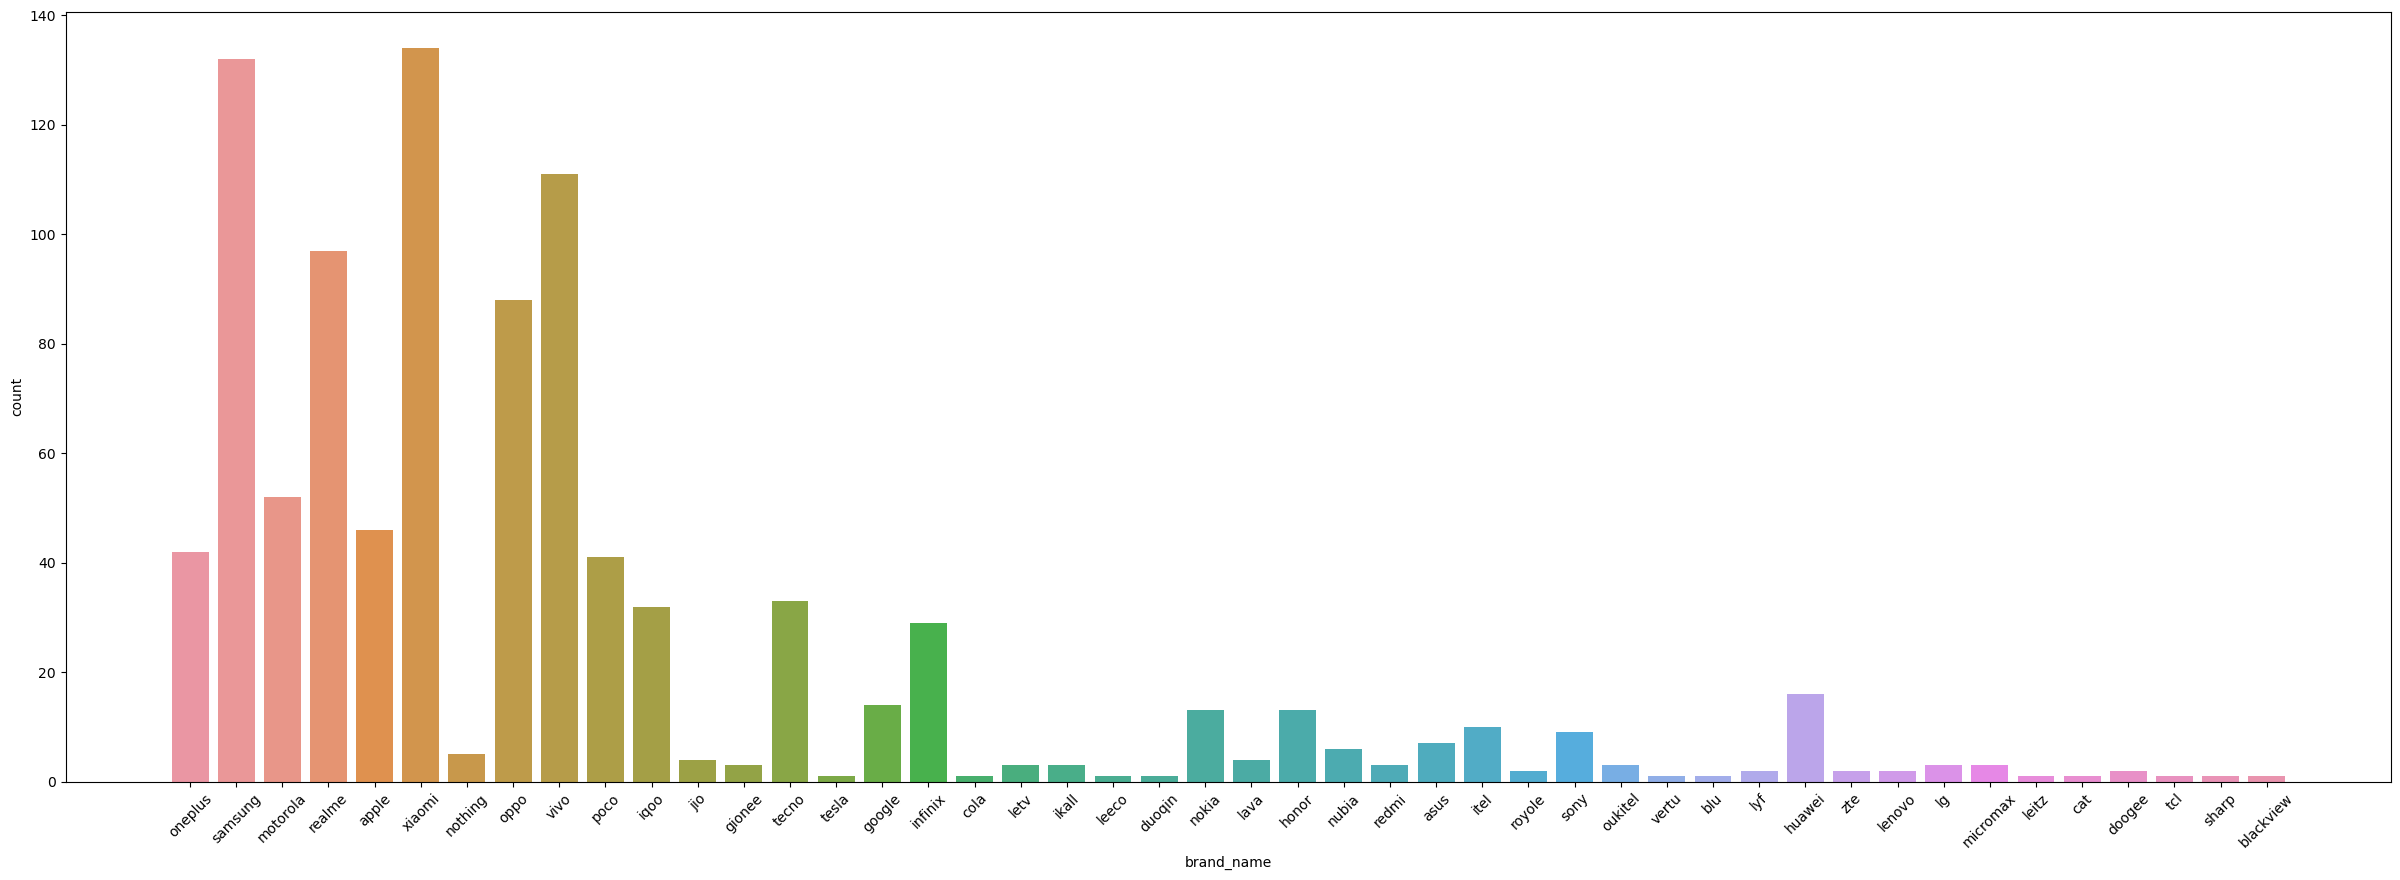

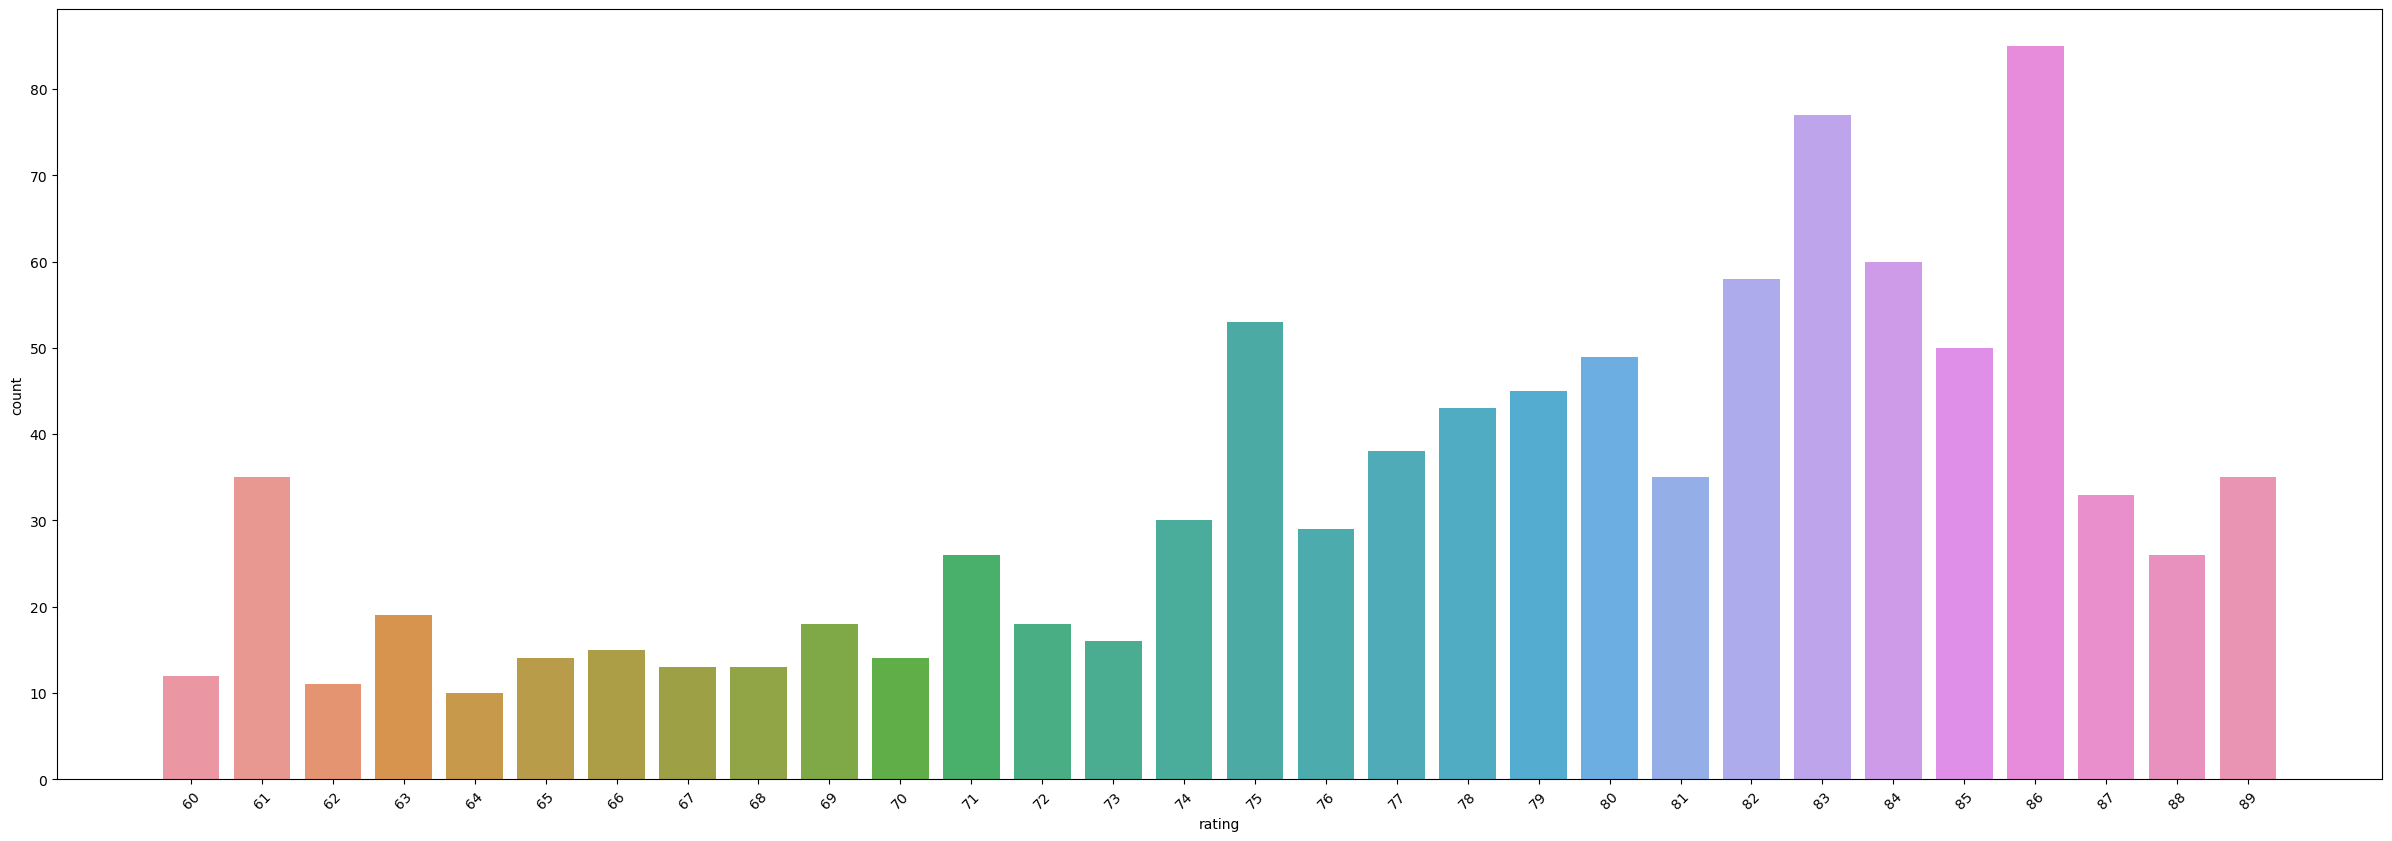

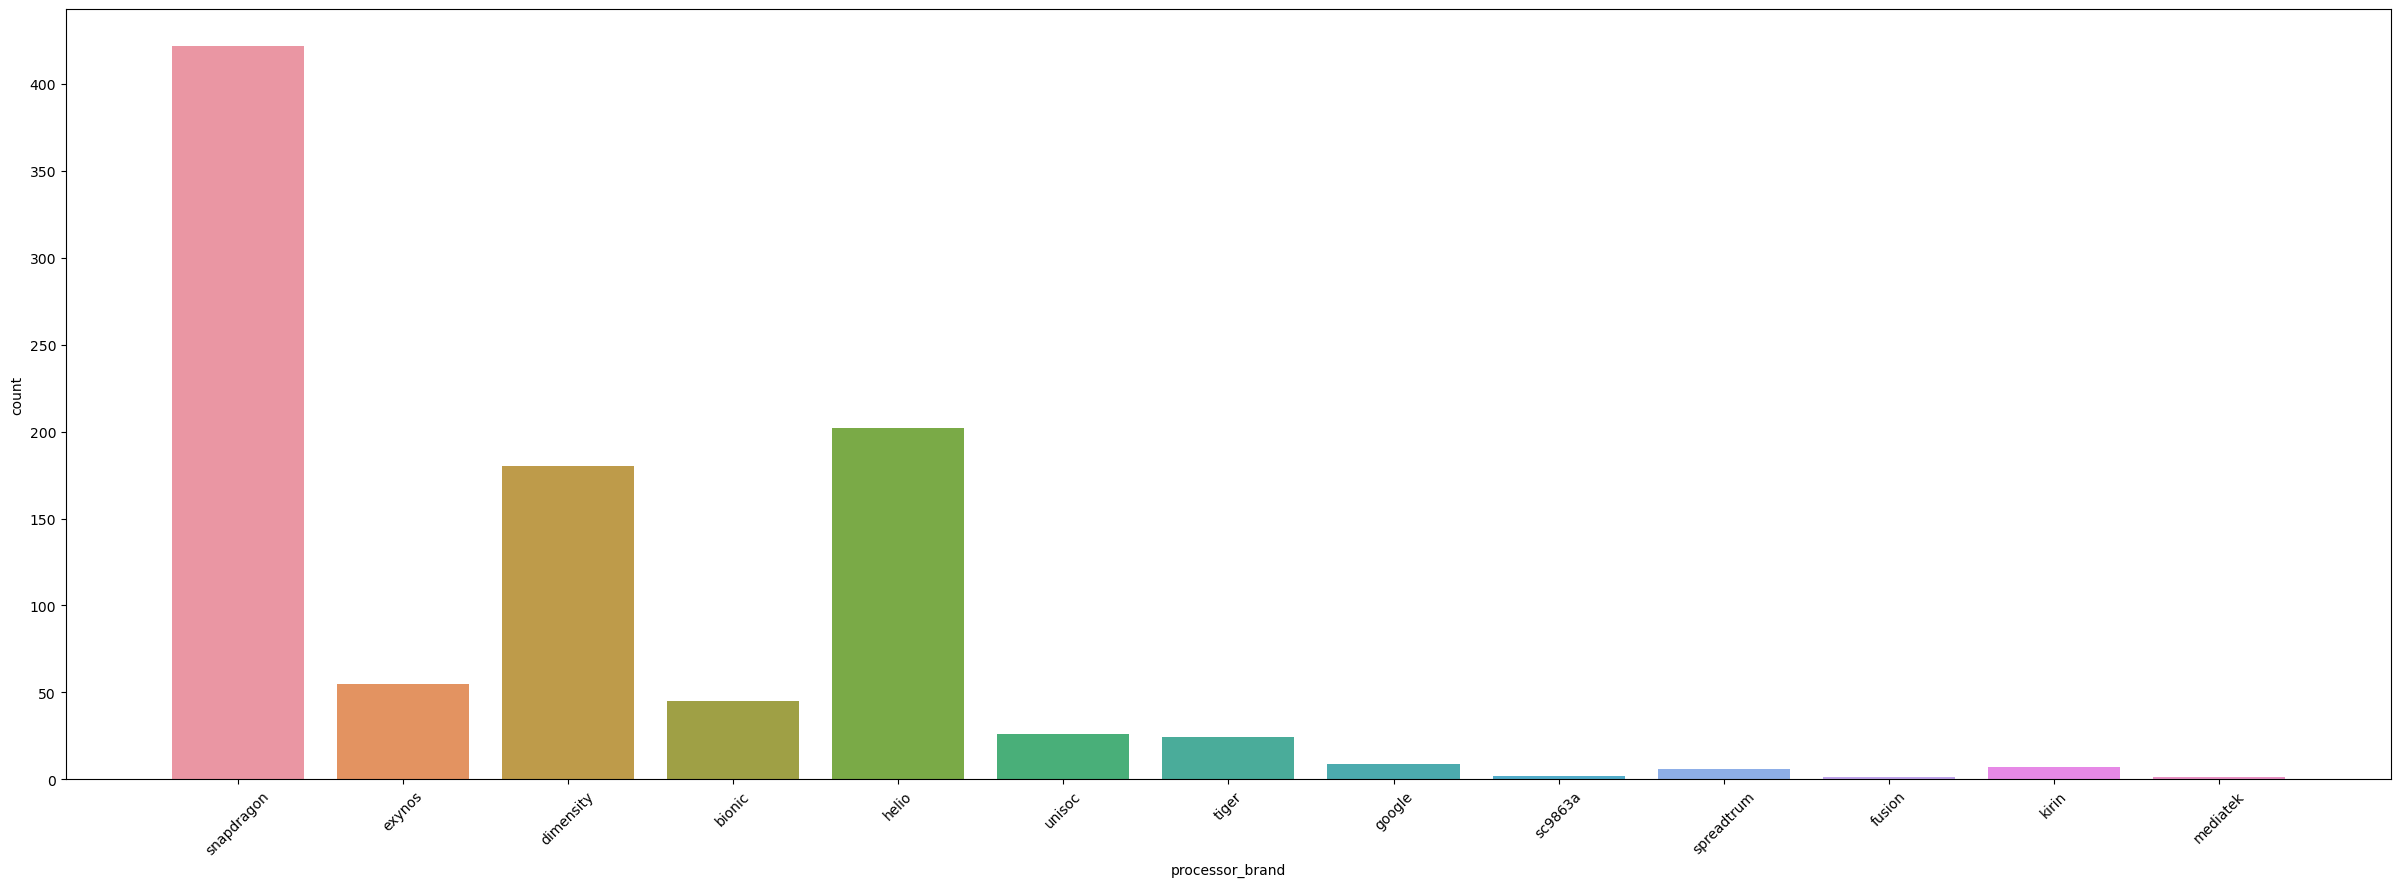

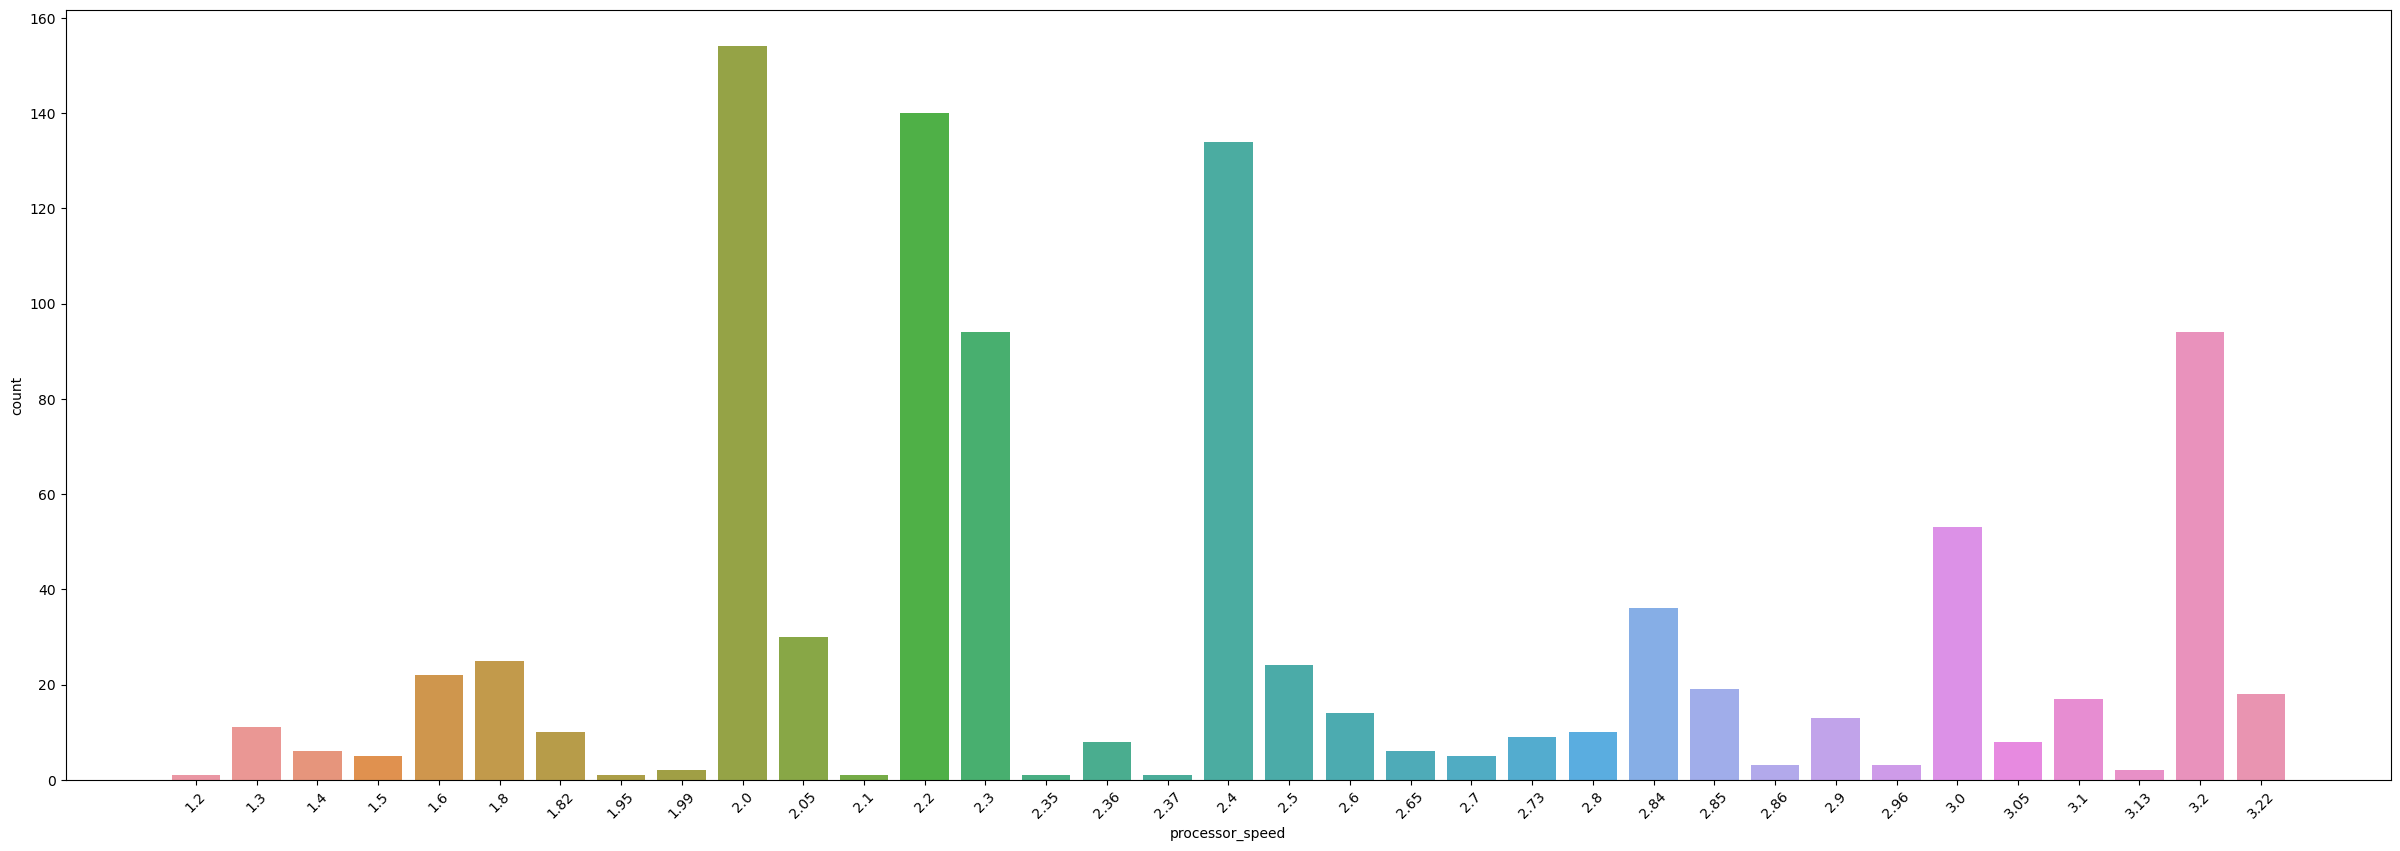

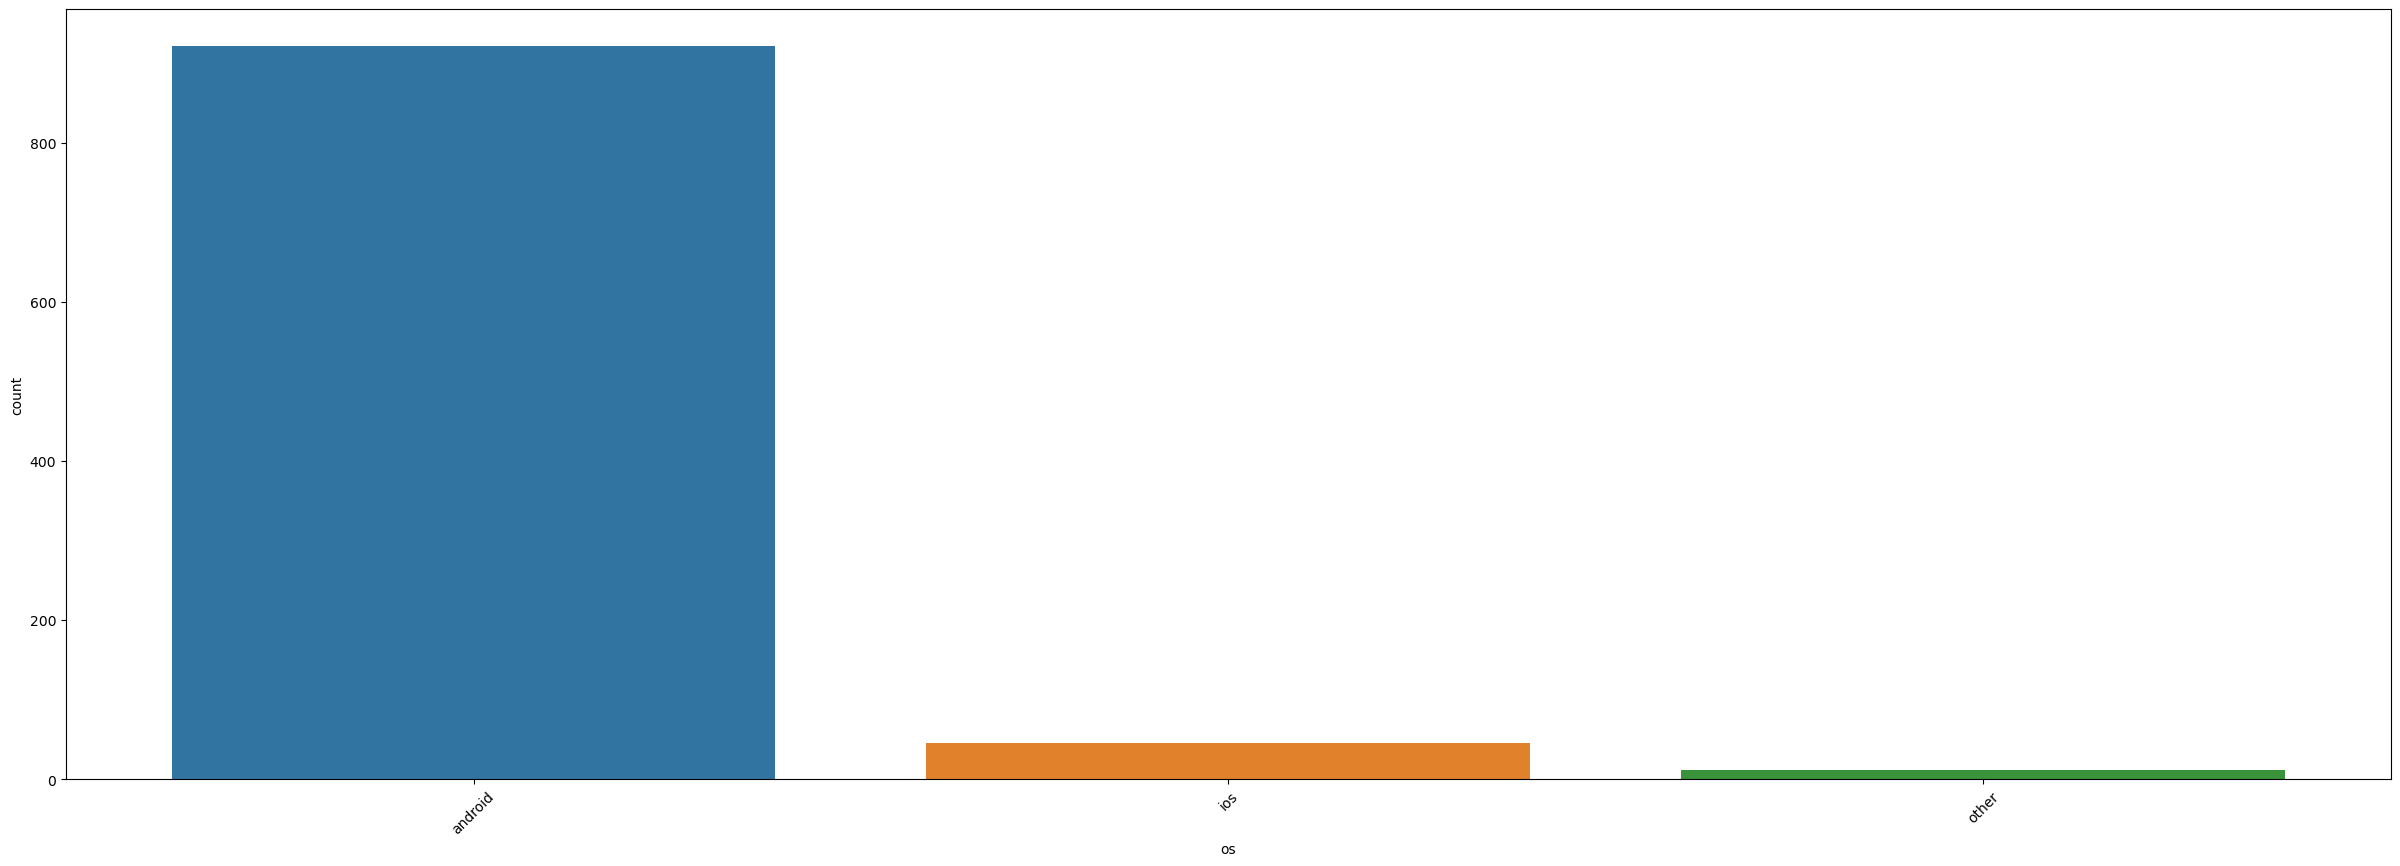

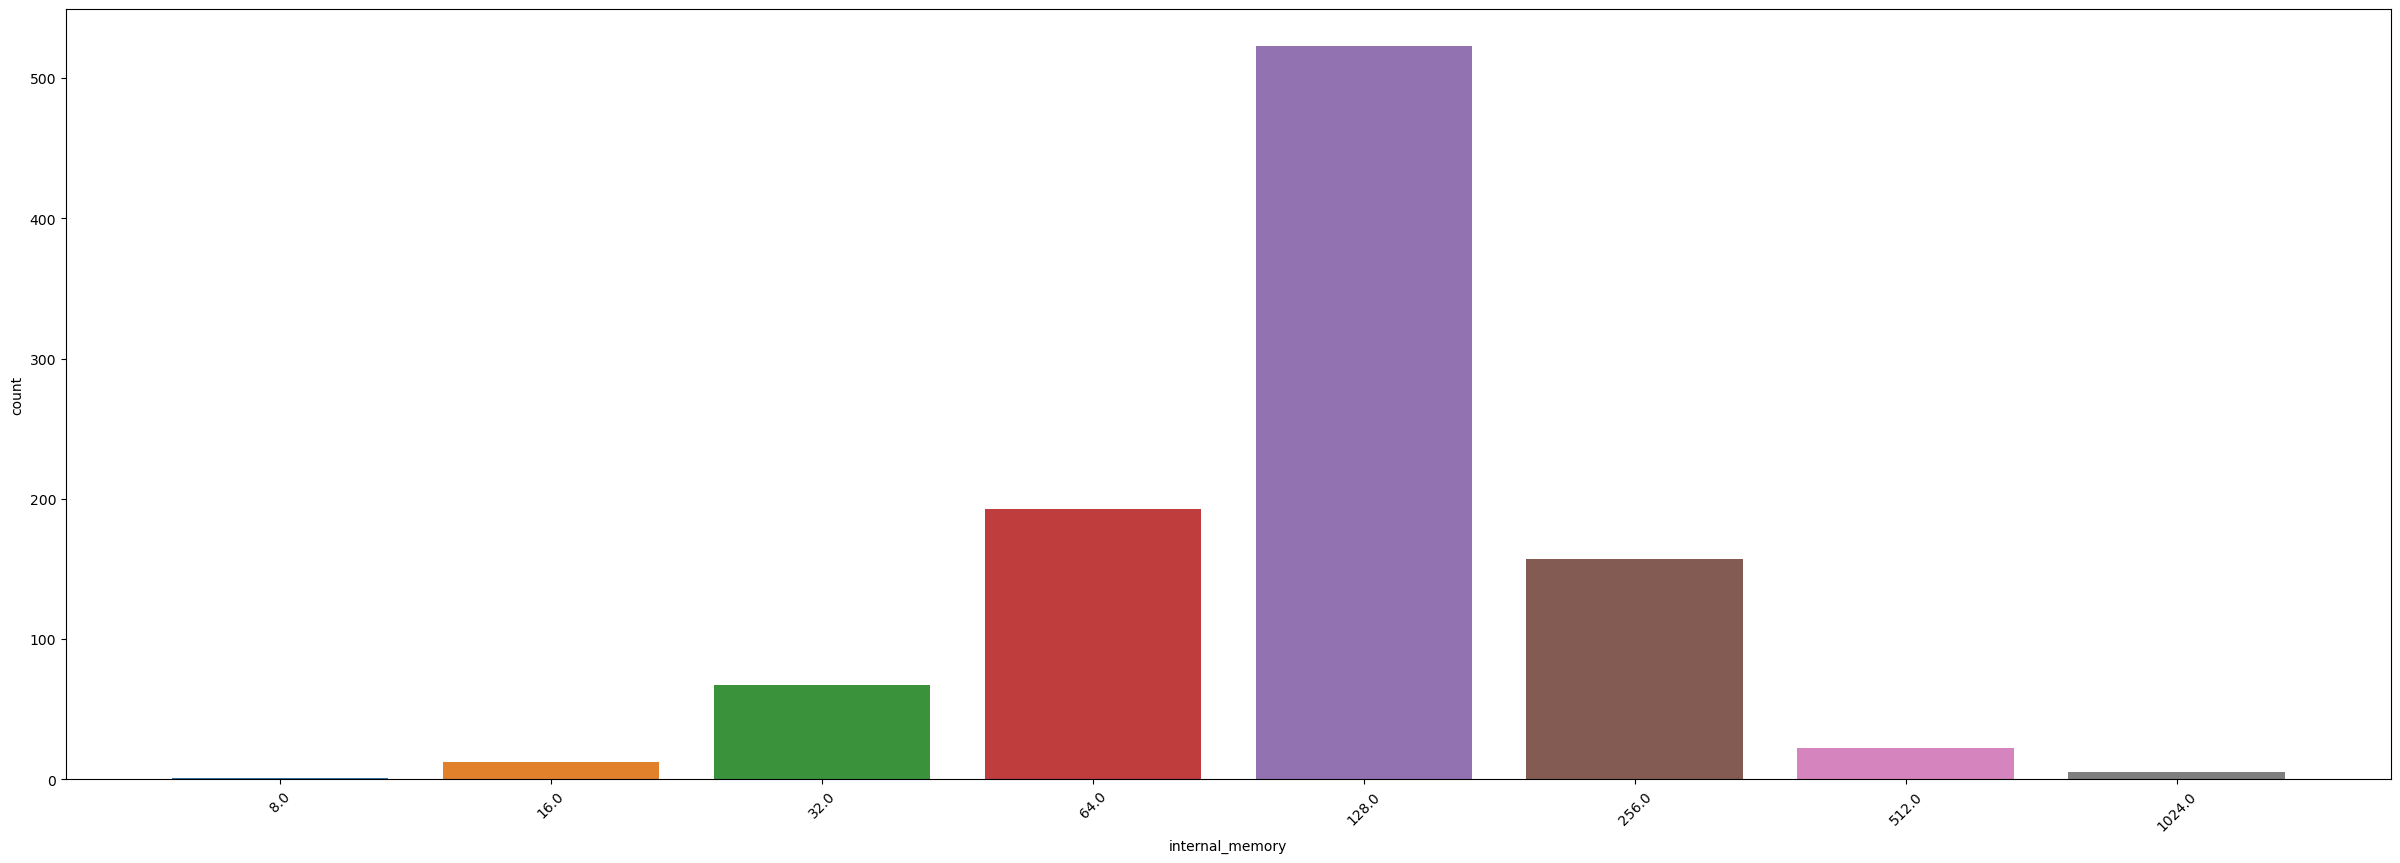

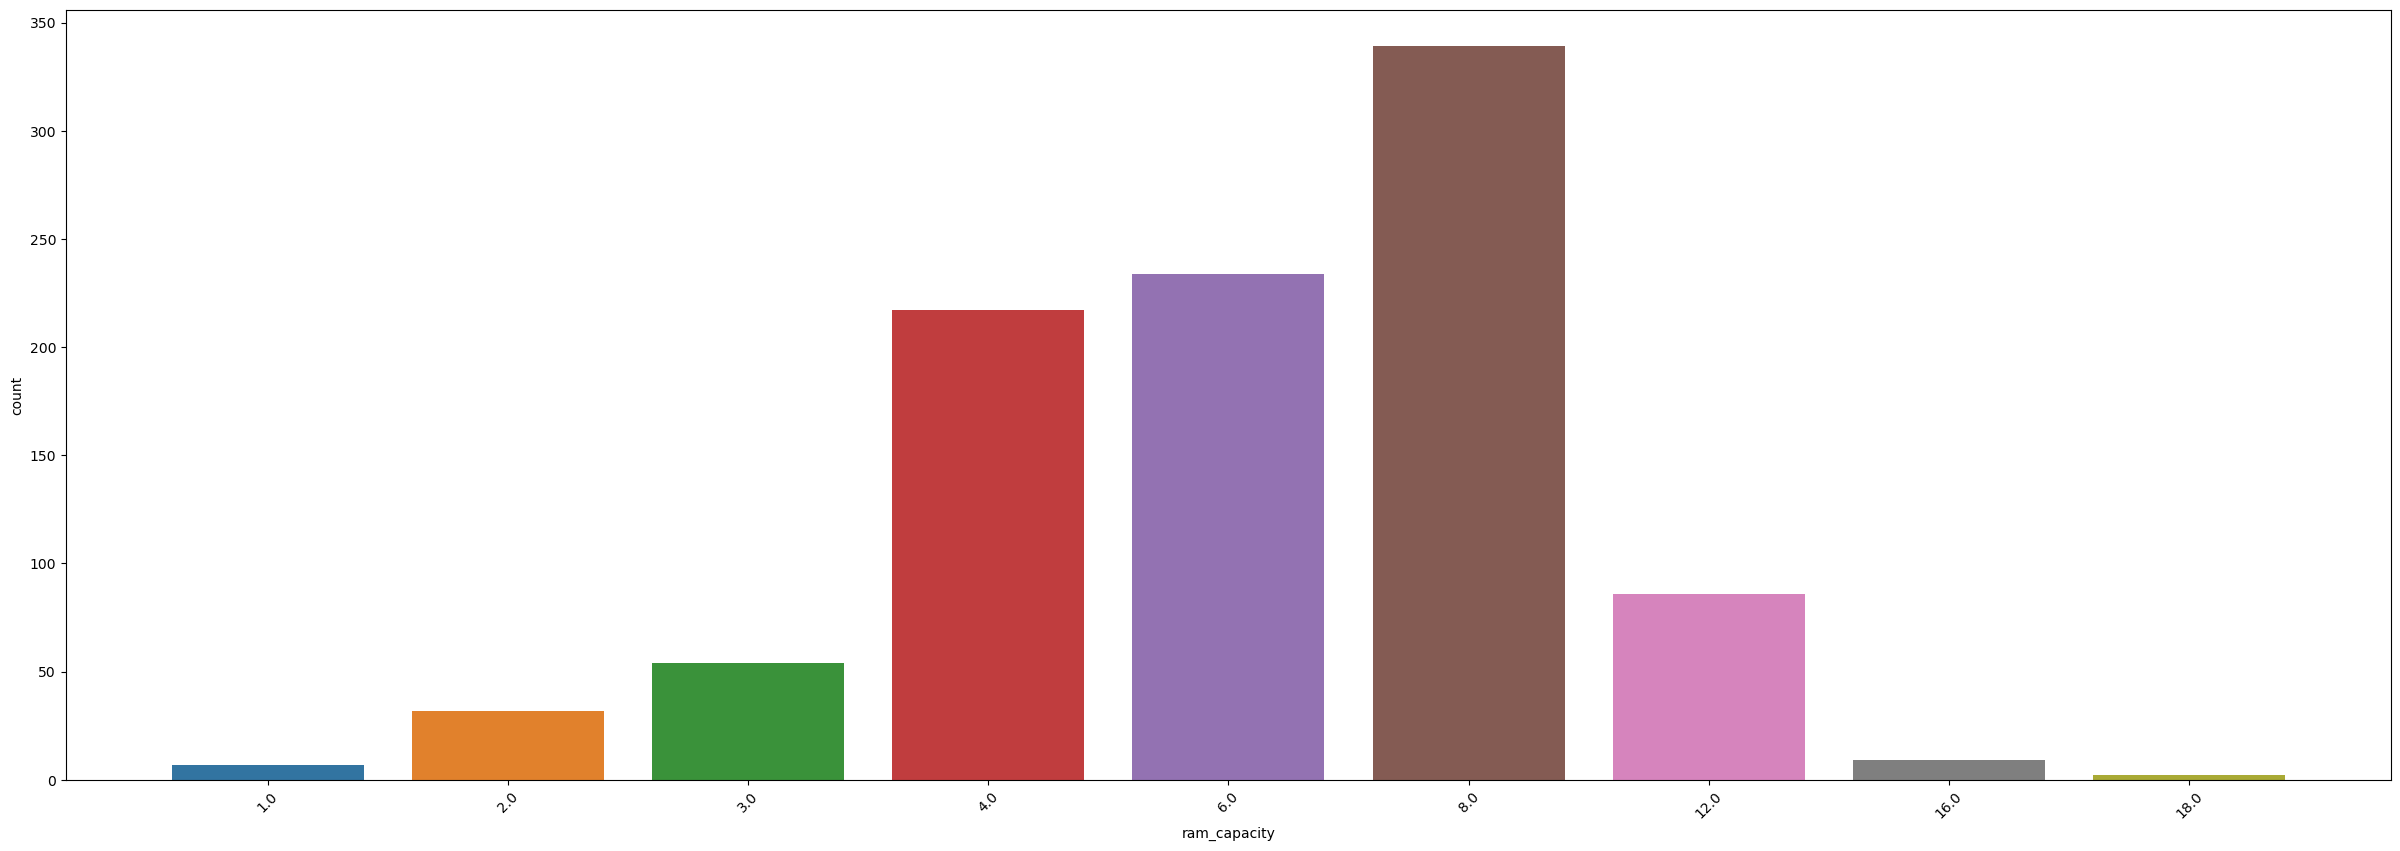

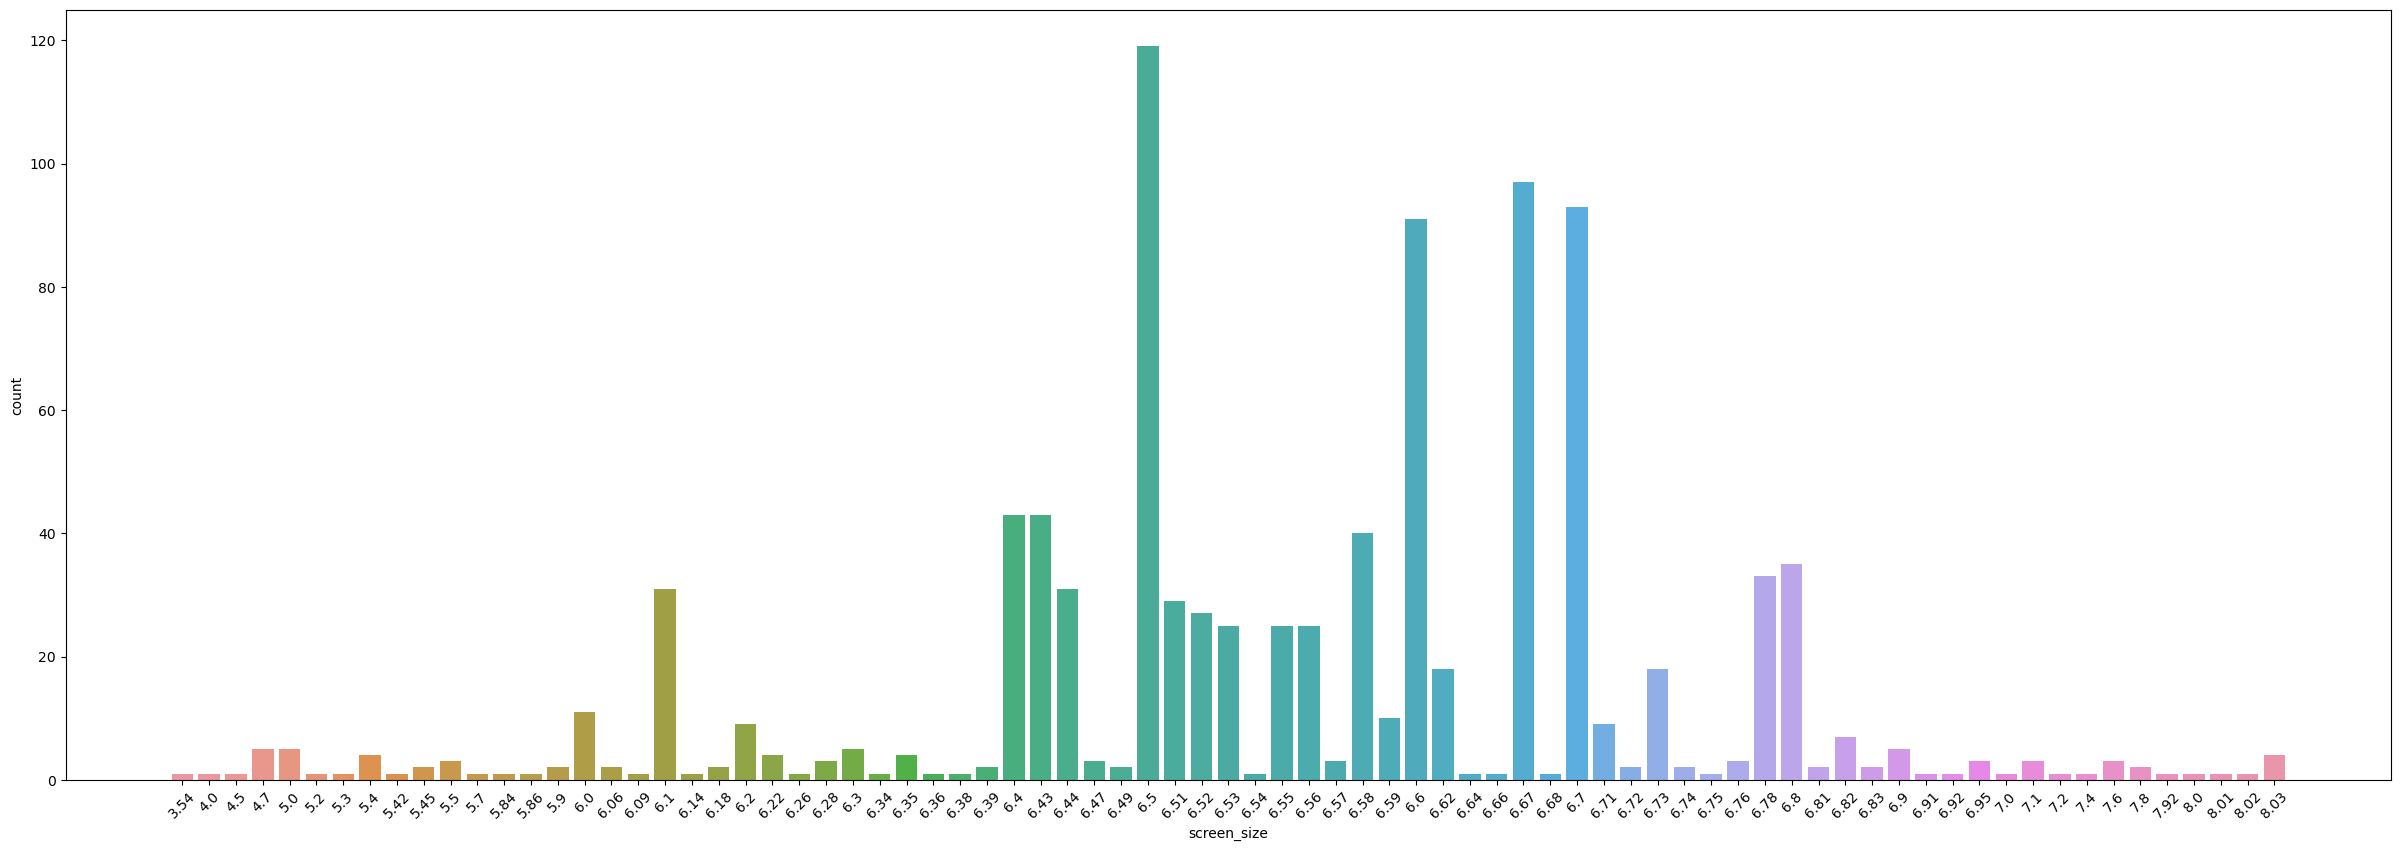

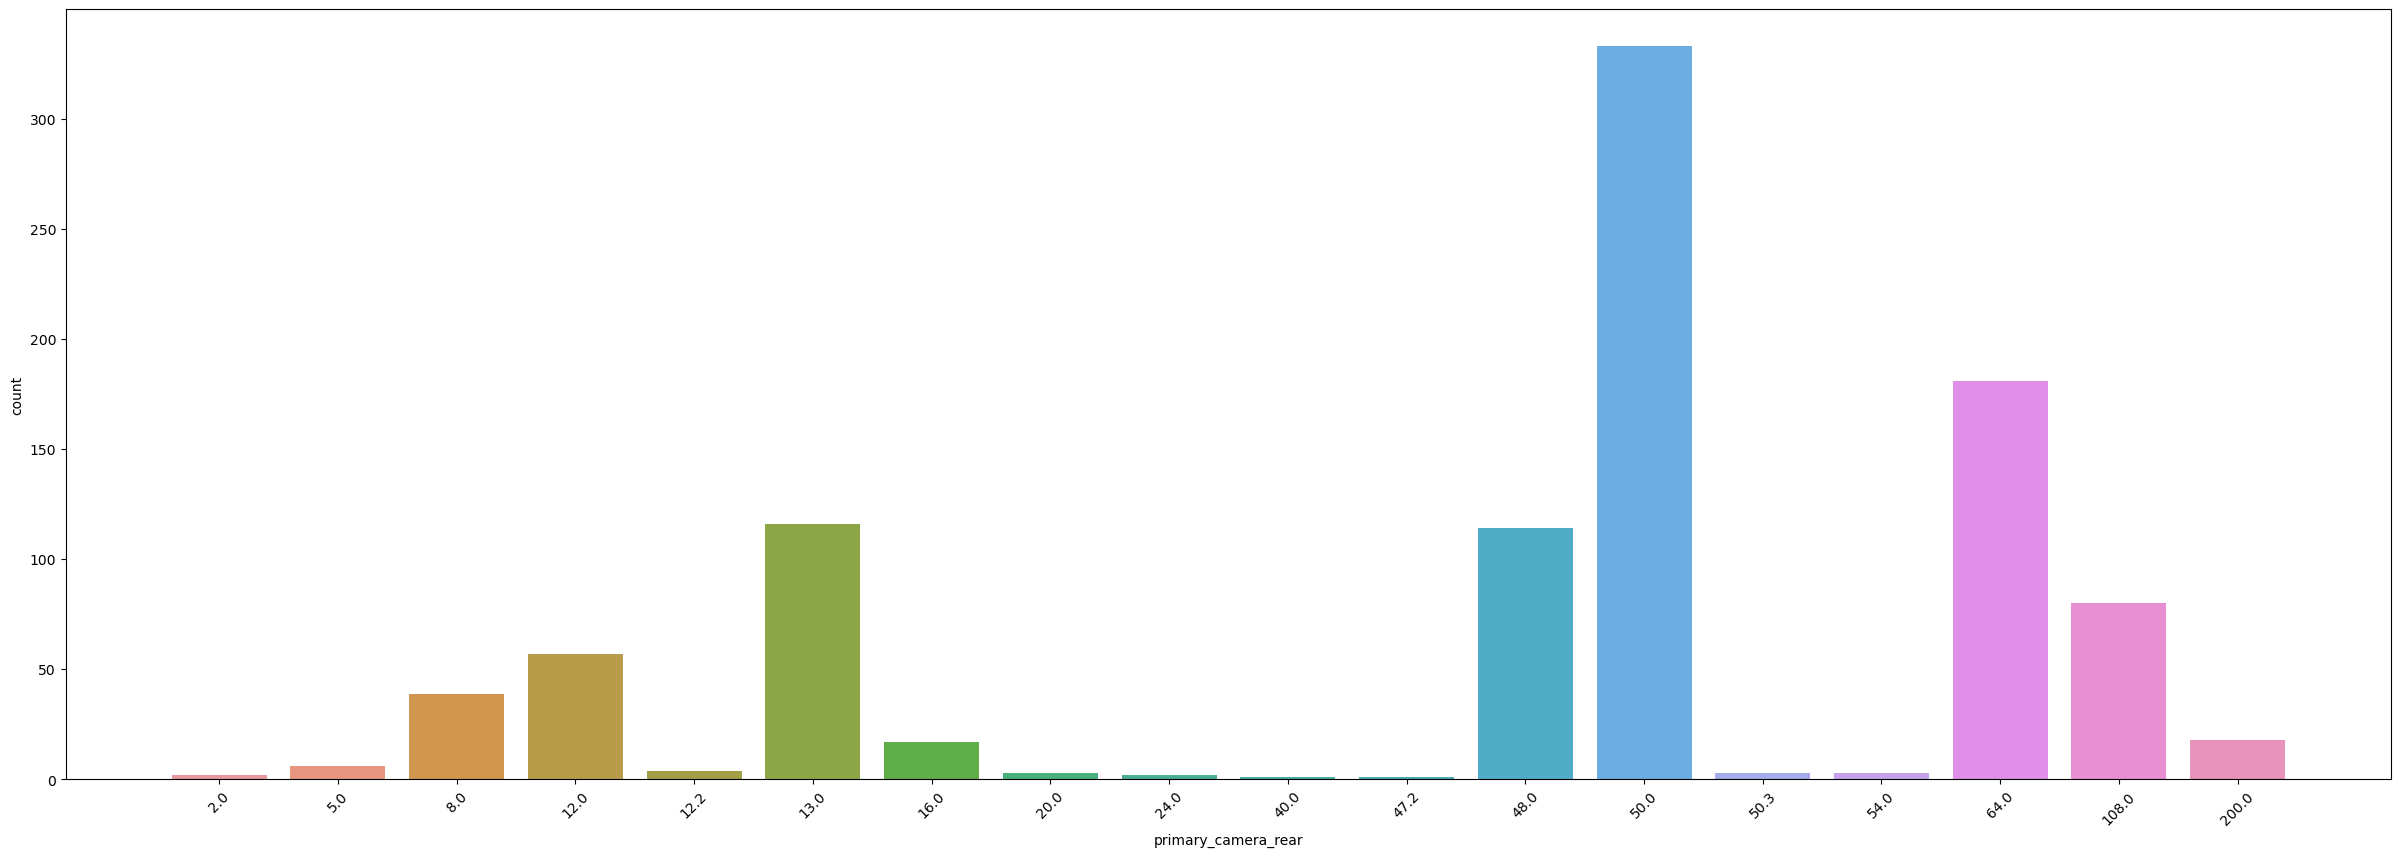

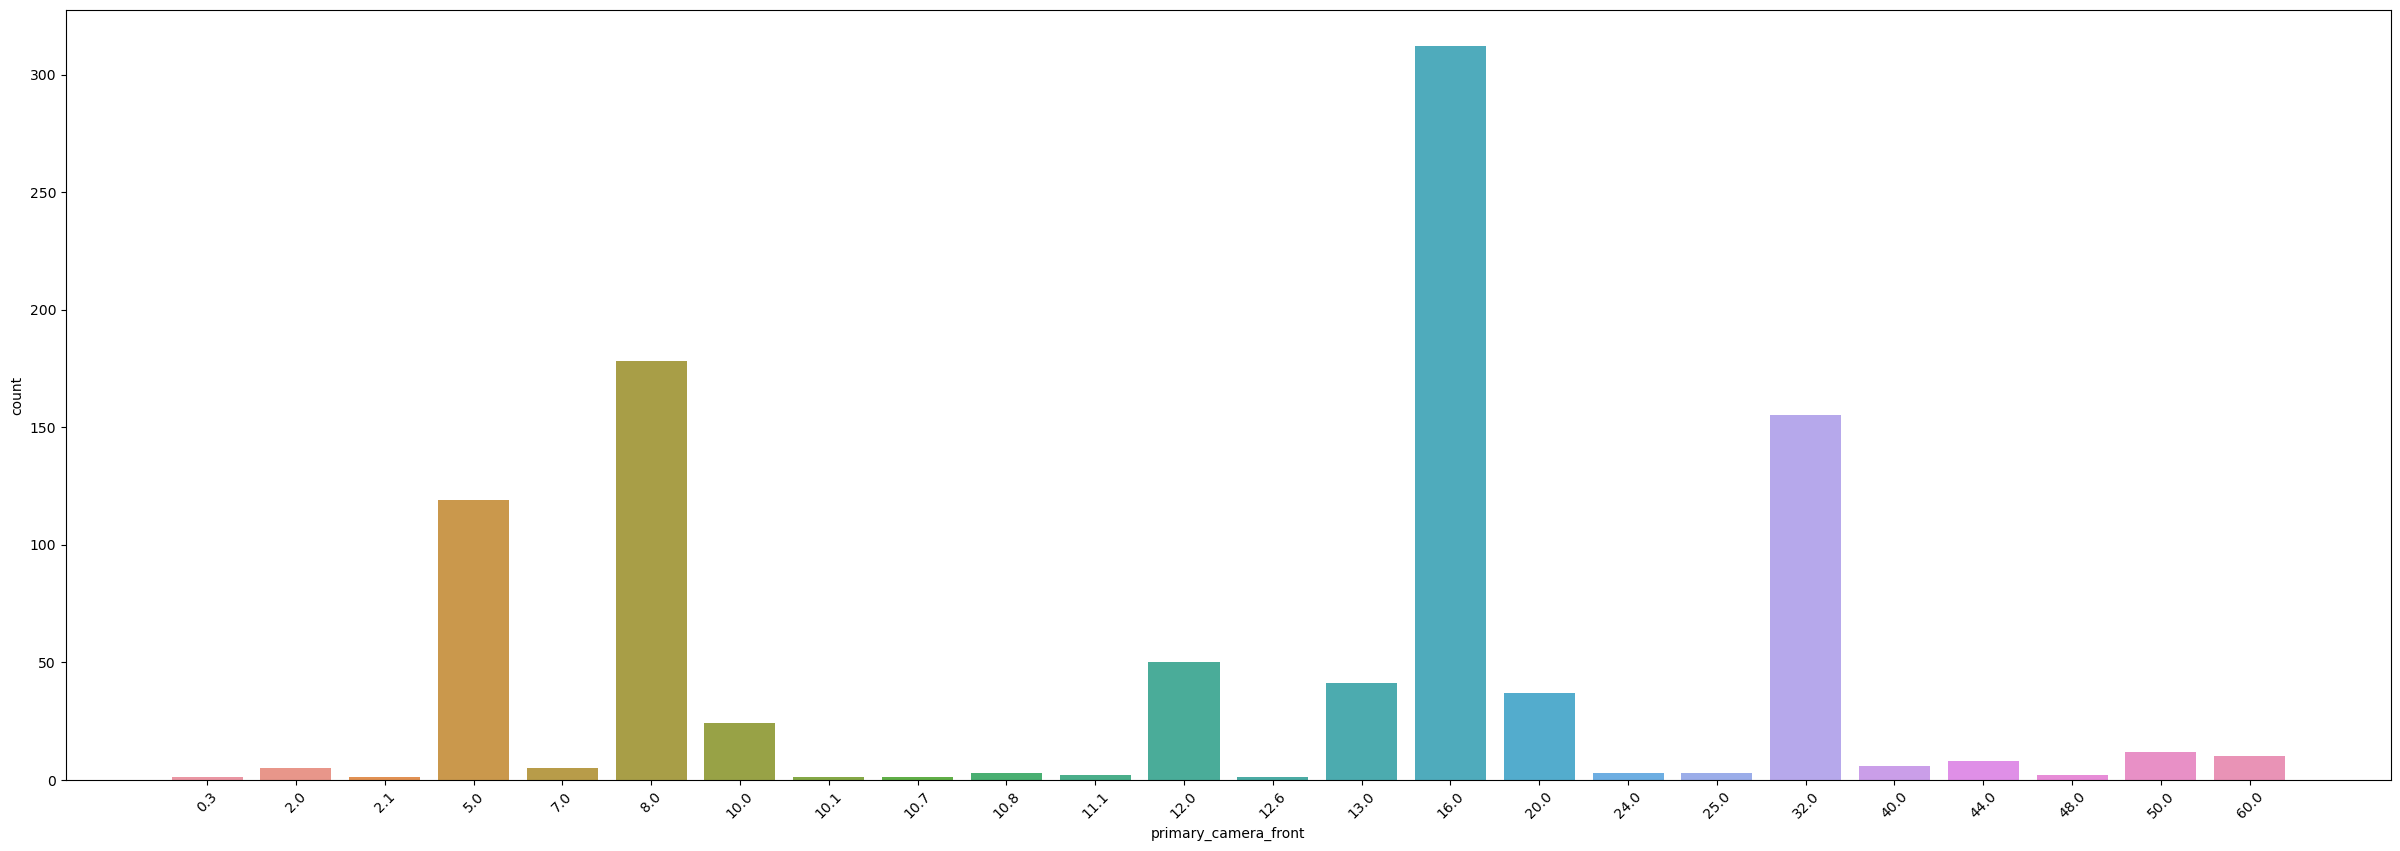

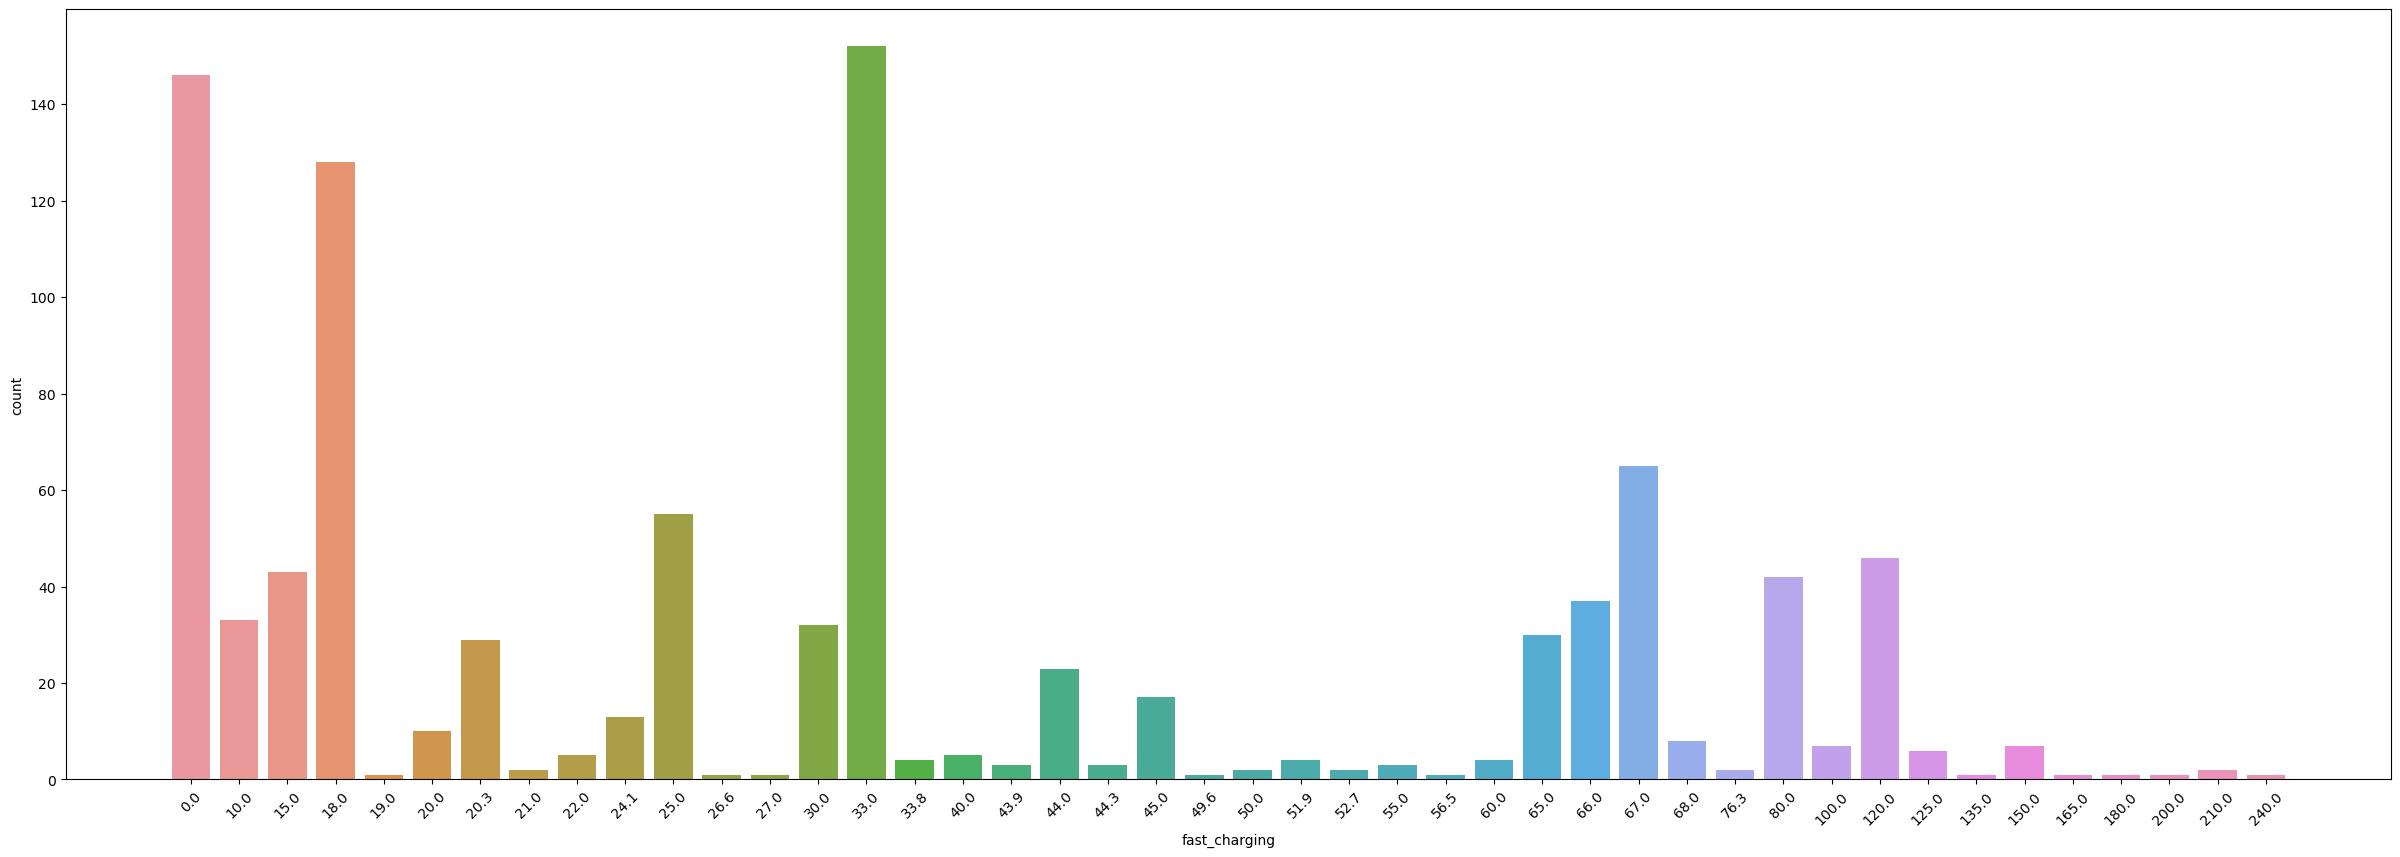

In [66]:
columns = ['brand_name','rating','processor_brand','processor_speed','os','internal_memory','ram_capacity','screen_size','primary_camera_rear',
       'primary_camera_front','fast_charging']

for i in columns:
    plt.figure(figsize=(30,10))
    sns.countplot(data=df,x=i)
    plt.xticks(rotation=45)
    plt.plot()

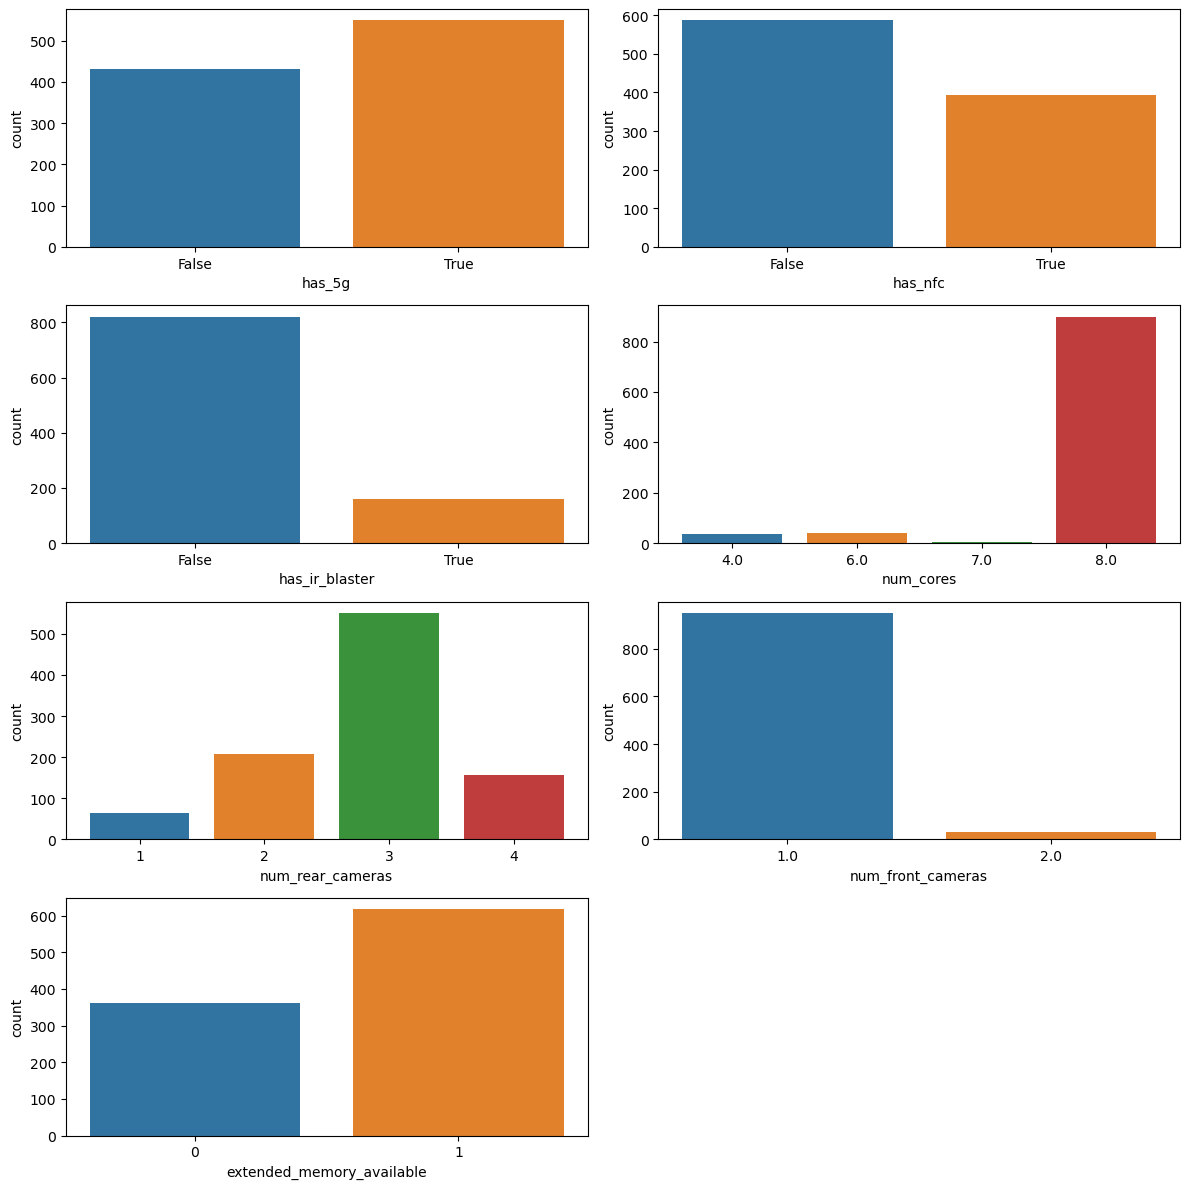

In [49]:
cols = ['has_5g', 'has_nfc', 'has_ir_blaster','num_cores','num_rear_cameras','num_front_cameras', 'extended_memory_available']

plt.figure(figsize=(12,12))

for i,col in enumerate(cols):
    plt.subplot(4,2,i+1)
    sns.countplot(data=df,x=col)
    plt.tight_layout()
    plt.plot()

C:\Users\lohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

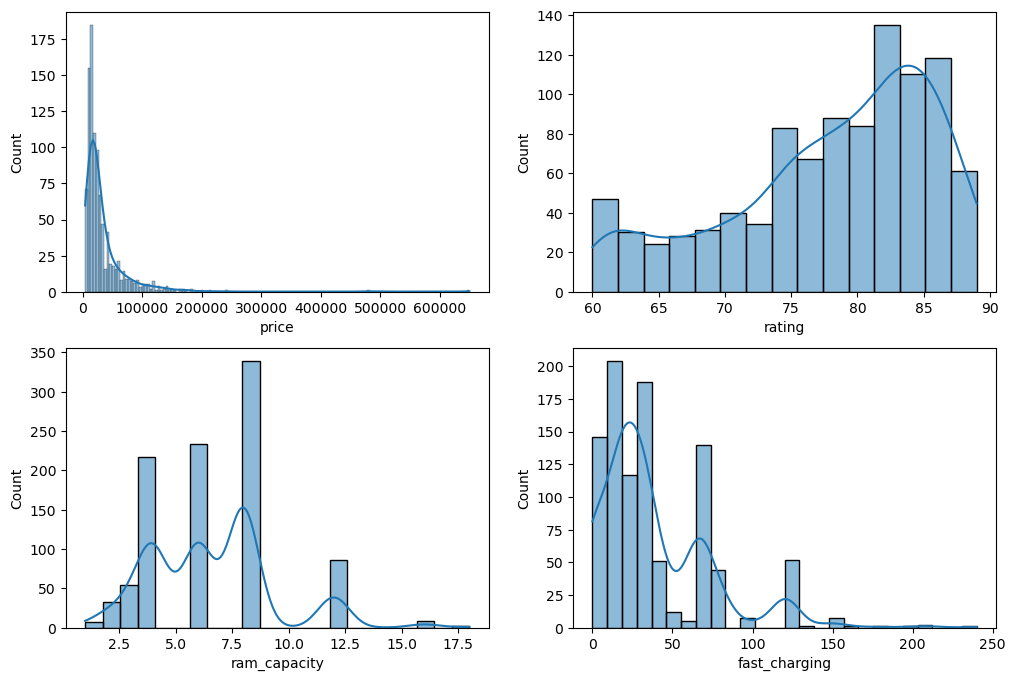

In [90]:
columns = ['price', 'rating','ram_capacity','fast_charging']
plt.figure(figsize=(12,8))
for i,col in enumerate(columns):
    plt.subplot(2,2,i+1)
    sns.histplot(data=df,x=col,kde=True)

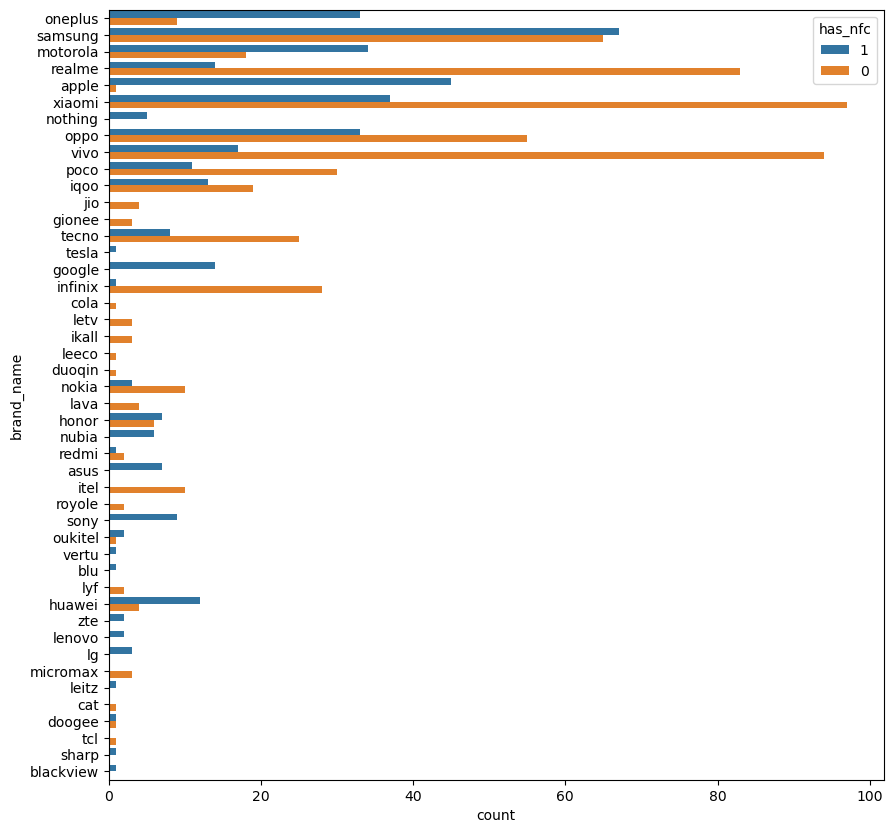

In [87]:
plt.figure(figsize=(10,10))
sns.countplot(data=df,y='brand_name',hue=df['has_nfc'].astype(str));


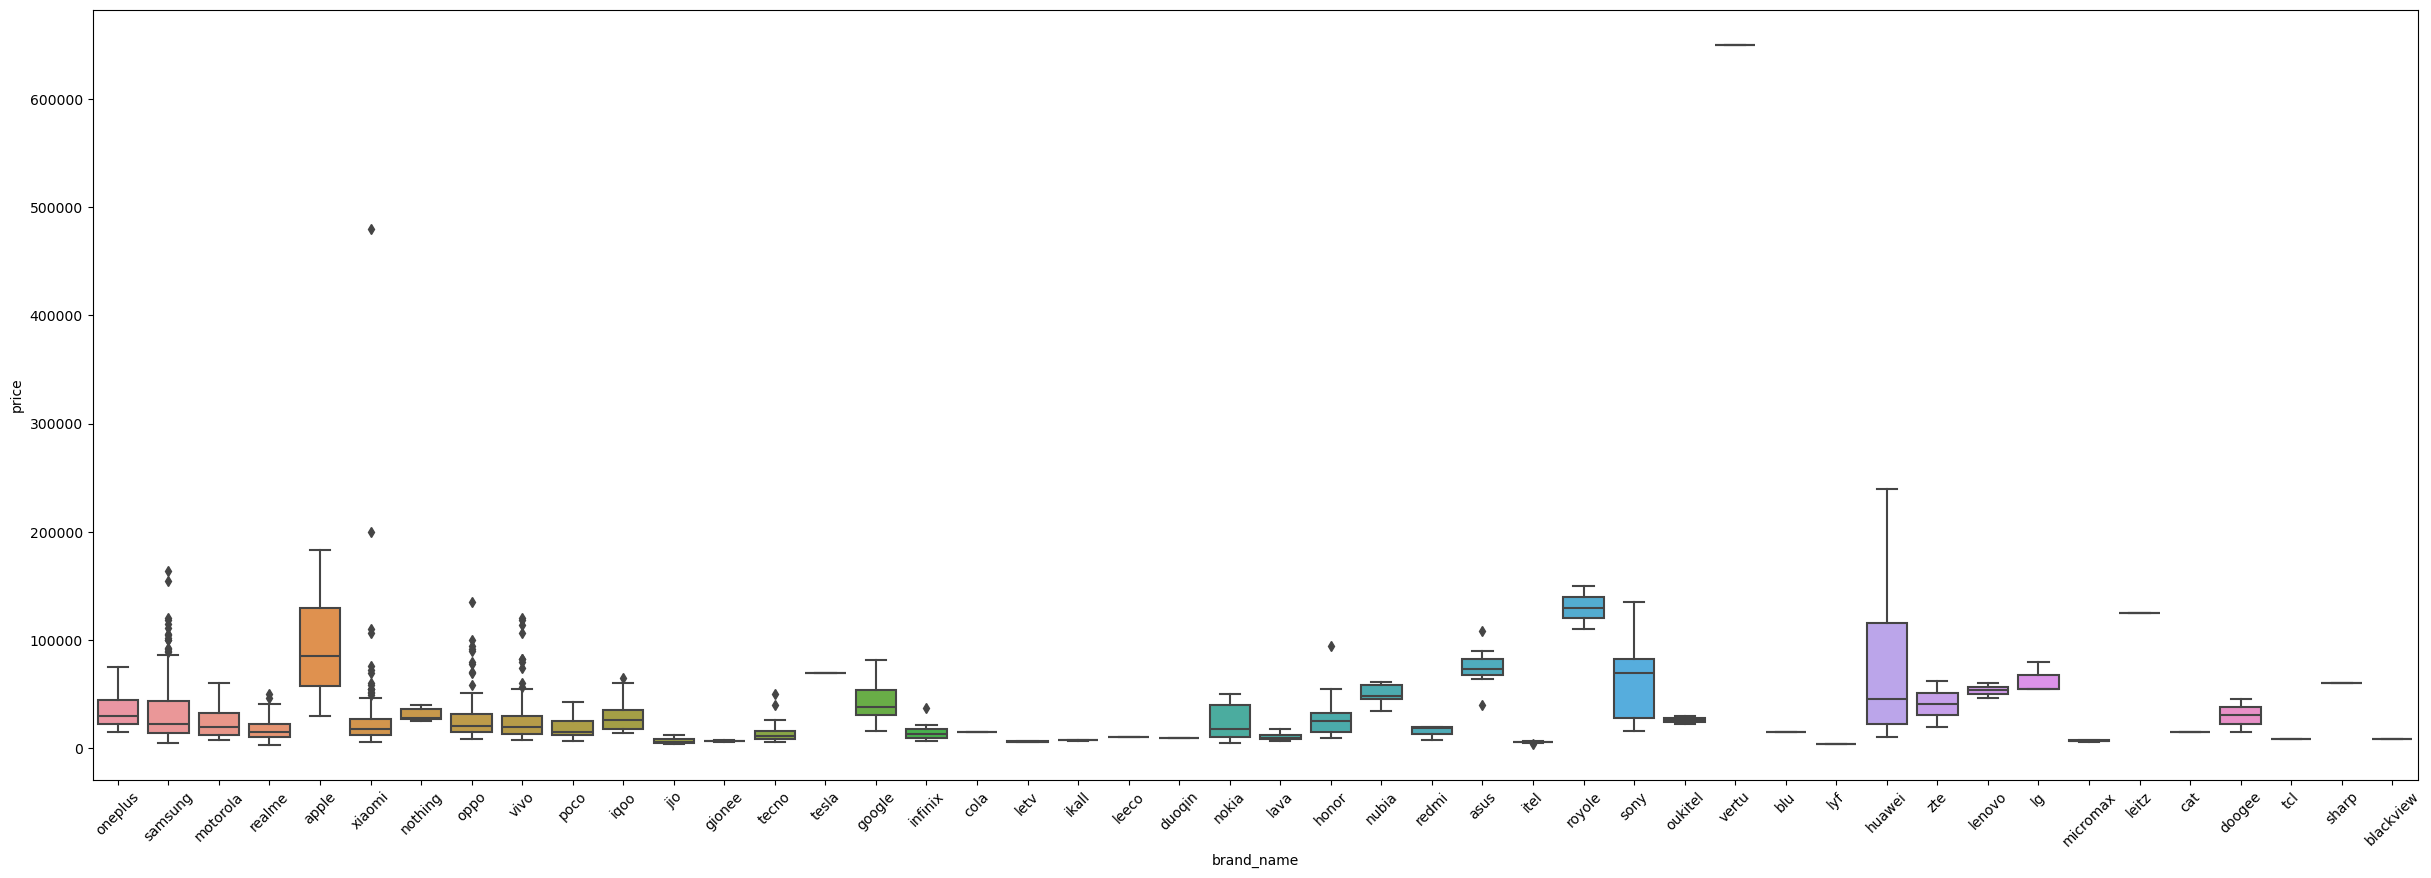

In [51]:
plt.figure(figsize=(30,10))
sns.boxplot(data=df,x='brand_name',y = 'price')
plt.xticks(rotation=45);

In [52]:
df[(df['brand_name']=='vertu') | (df['price']>300000)] 

,brand_name,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
427,vertu,650000,62,False,True,False,snapdragon,8.0,1.5,2275.0,...,60,1,1.0,android,13.0,2.1,0,0.0,1080,1920
887,xiaomi,480000,88,False,True,False,snapdragon,8.0,2.8,4000.0,...,60,3,1.0,android,48.0,20.0,0,0.0,1080,2340


In [53]:
df_new = df.drop(index=[427,887])

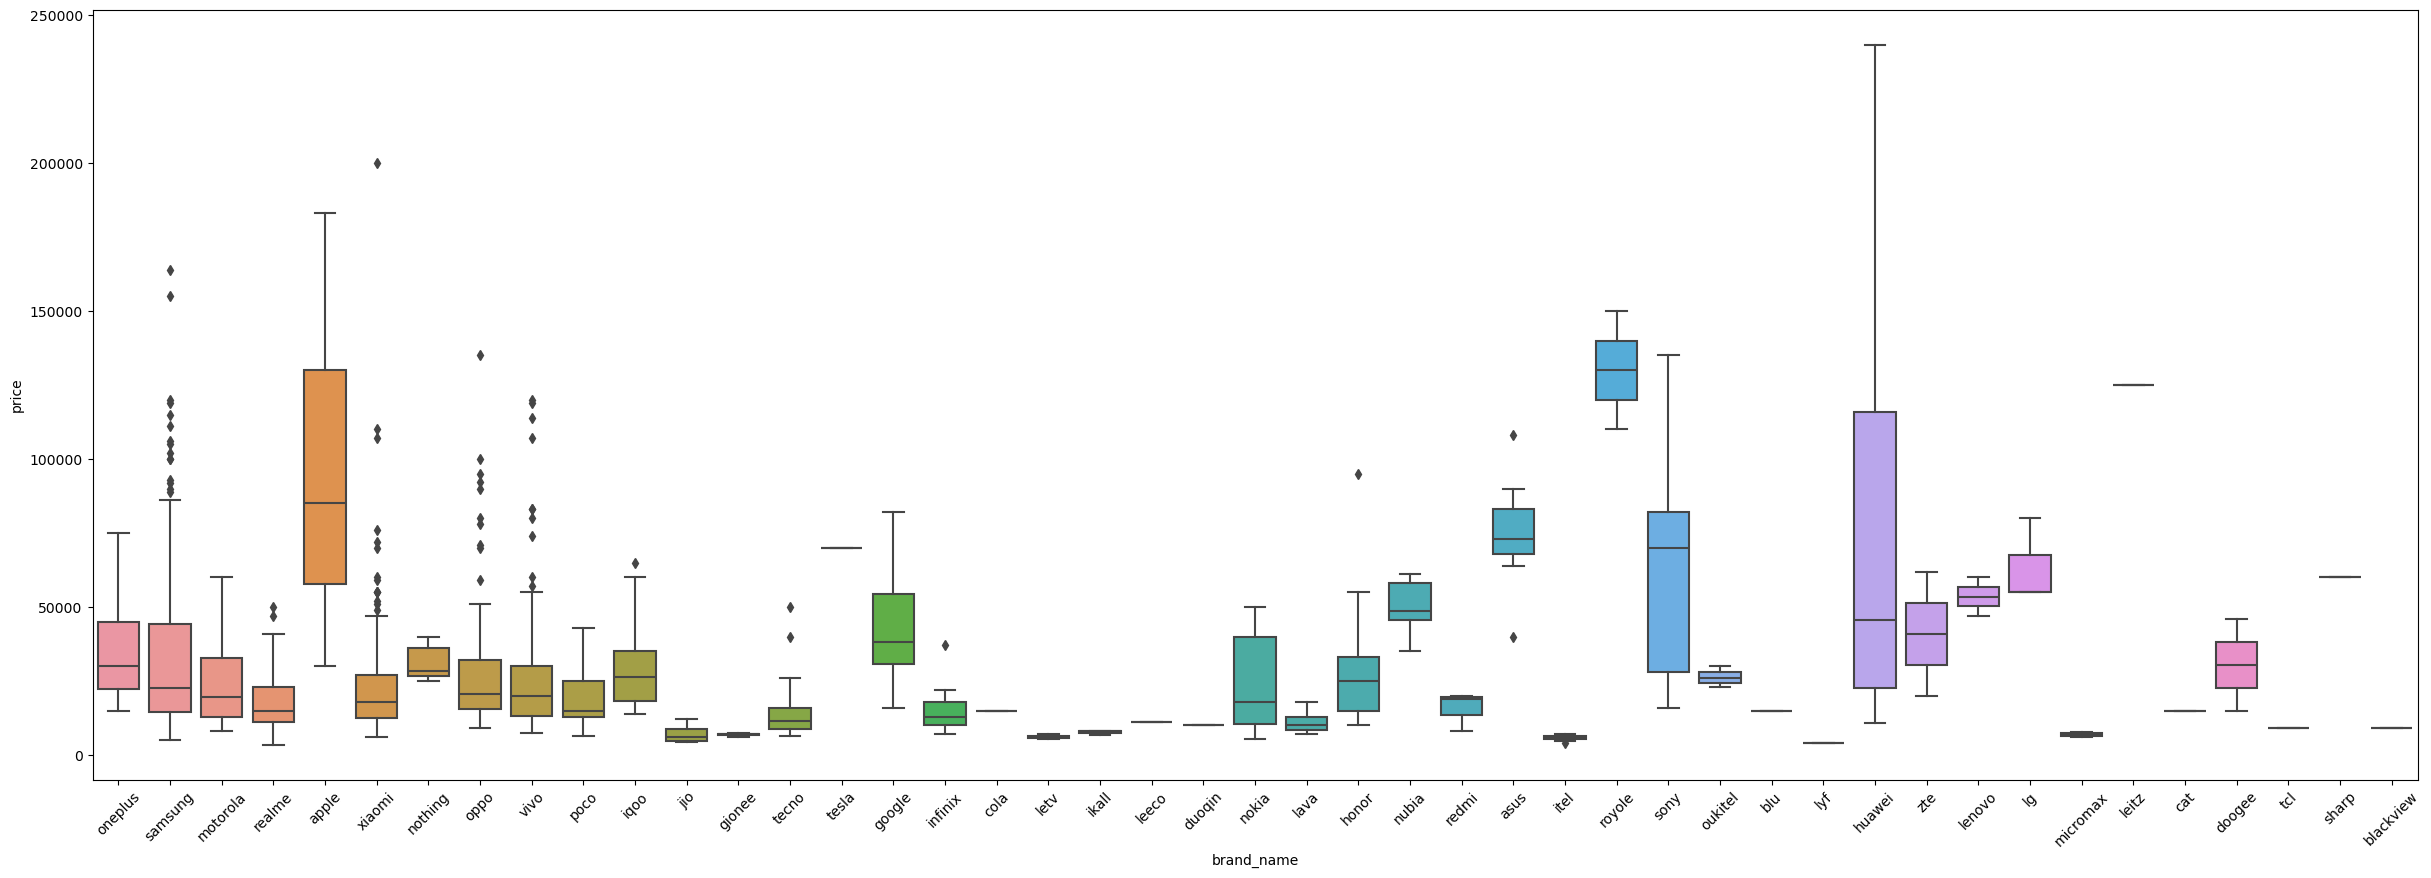

In [54]:
plt.figure(figsize=(30,10))
sns.boxplot(data=df_new,x='brand_name',y = 'price')
plt.xticks(rotation=45);

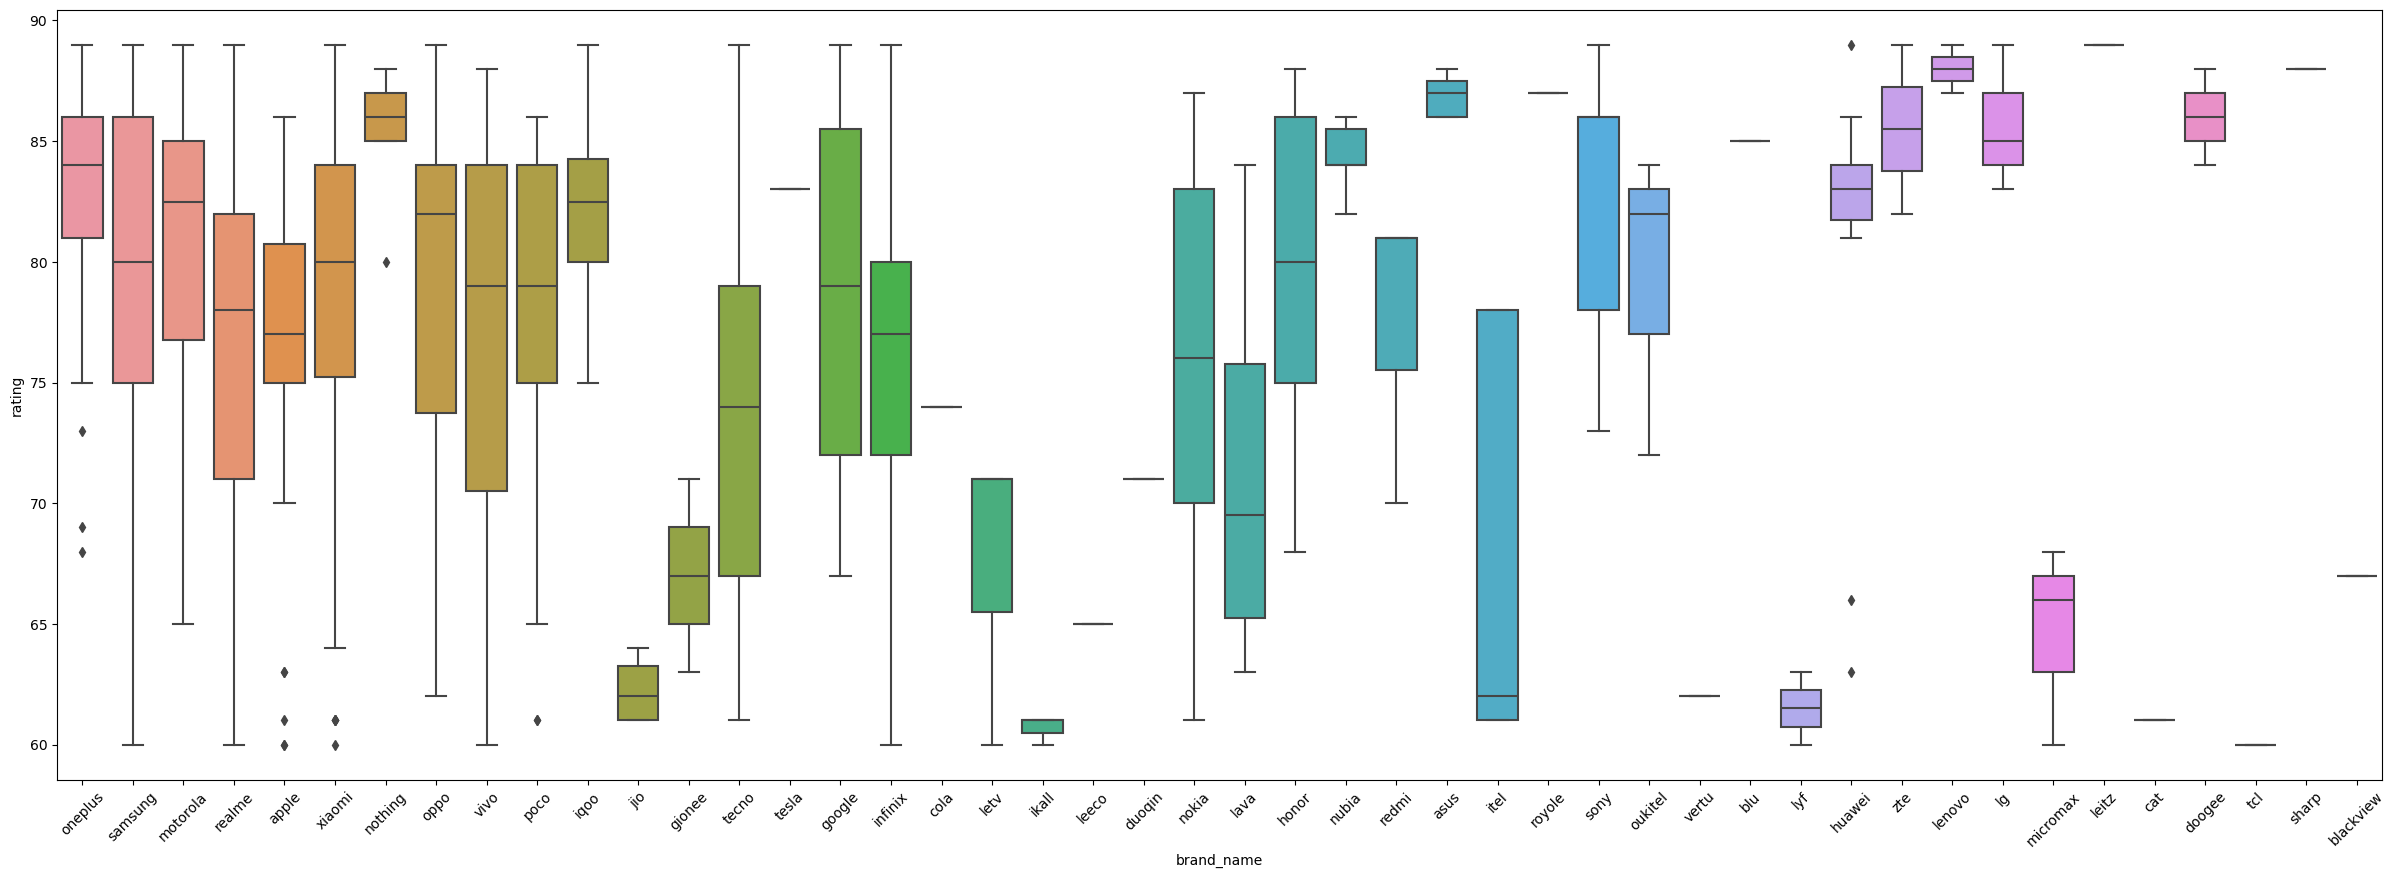

In [55]:
plt.figure(figsize=(30,10))
sns.boxplot(data=df,x='brand_name',y = 'rating')
plt.xticks(rotation=45);

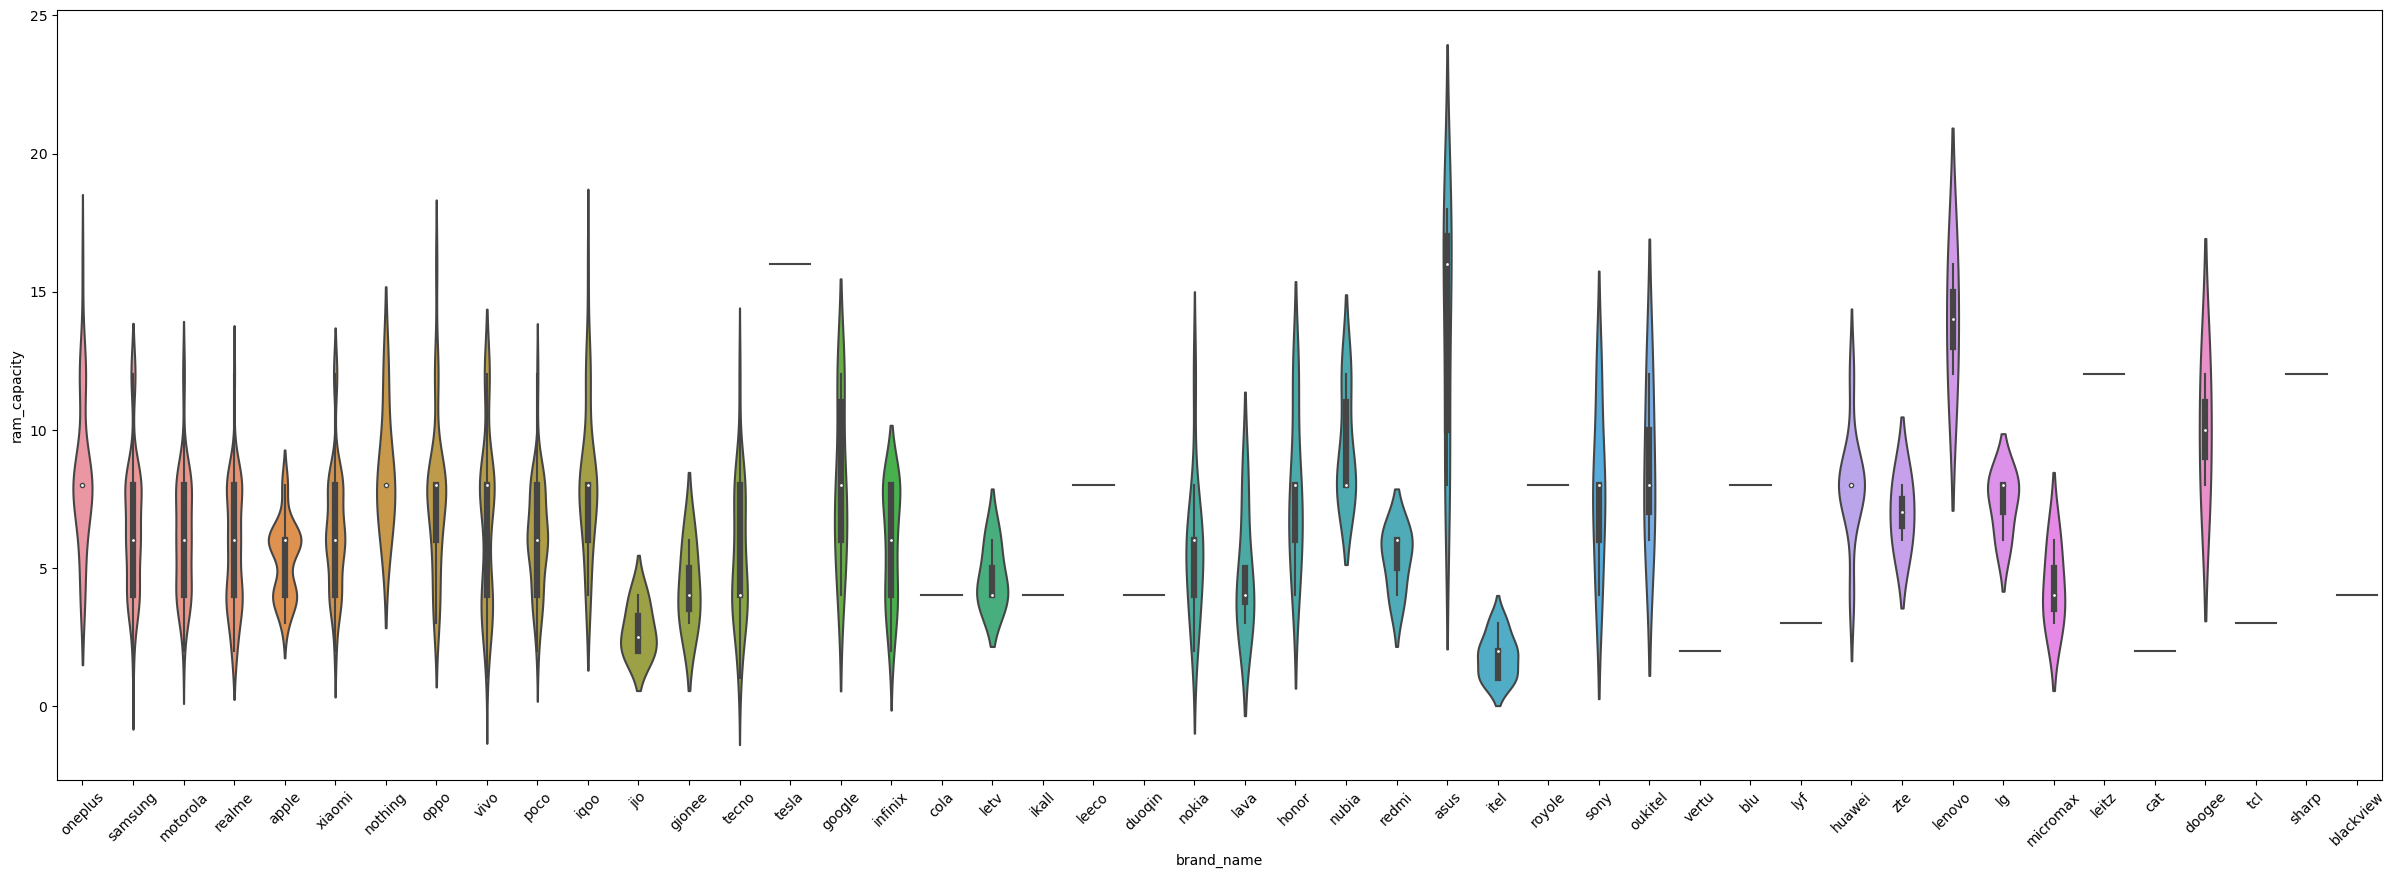

In [56]:
plt.figure(figsize=(30,10))
sns.violinplot(data=df,x='brand_name',y = 'ram_capacity')
plt.xticks(rotation=45);

In [57]:
df[['brand_name','ram_capacity']].value_counts().reset_index()

,brand_name,ram_capacity,count
0,xiaomi,6.0,49
1,vivo,8.0,45
2,samsung,8.0,44
3,oppo,8.0,43
4,xiaomi,8.0,39
...,...,...,...
139,micromax,4.0,1
140,micromax,3.0,1
141,lg,6.0,1
142,letv,6.0,1


In [58]:
group = df.groupby(['brand_name'])
new = group['ram_capacity'].value_counts().reset_index()
new

,brand_name,ram_capacity,count
0,apple,6.0,23
1,apple,4.0,16
2,apple,8.0,4
3,apple,3.0,3
4,asus,18.0,2
...,...,...,...
139,xiaomi,12.0,9
140,xiaomi,2.0,4
141,xiaomi,3.0,2
142,zte,6.0,1


C:\Users\lohit\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


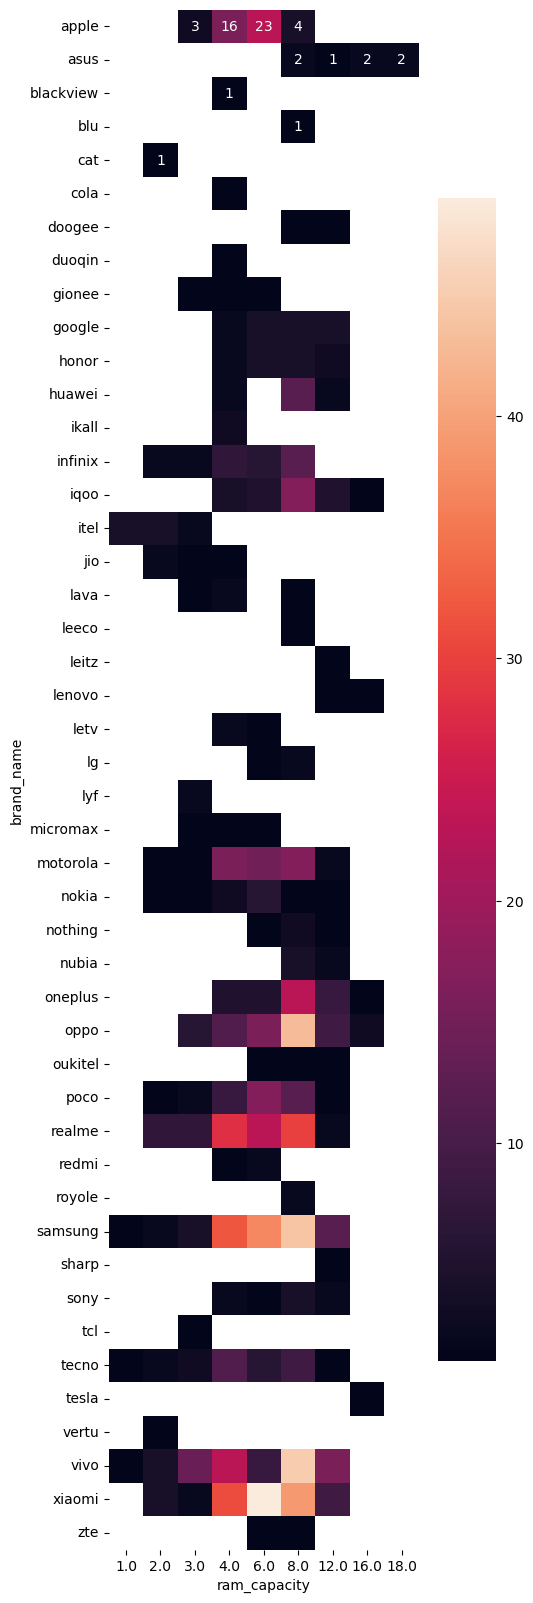

In [59]:
pivot = pd.pivot_table(data=new,index='brand_name',columns='ram_capacity',values='count',aggfunc='median')
plt.figure(figsize=(5,20))
sns.heatmap(pivot,annot=True,fmt='.0f');

In [60]:
df.columns

Index(['brand_name', 'price', 'rating', 'has_5g', 'has_nfc', 'has_ir_blaster',
       'processor_brand', 'num_cores', 'processor_speed', 'battery_capacity',
       'fast_charging_available', 'fast_charging', 'ram_capacity',
       'internal_memory', 'screen_size', 'refresh_rate', 'num_rear_cameras',
       'num_front_cameras', 'os', 'primary_camera_rear',
       'primary_camera_front', 'extended_memory_available', 'extended_upto',
       'resolution_width', 'resolution_height'],
      dtype='object')

In [61]:
df['fast_charging_available'].value_counts()

fast_charging_available
1    837
0    143
Name: count, dtype: int64

In [67]:
group = df.groupby(['brand_name'])
fast_charging = group['fast_charging_available'].value_counts().reset_index()
fast_charging

,brand_name,fast_charging_available,count
0,apple,1,32
1,apple,0,14
2,asus,1,7
3,blackview,1,1
4,blu,1,1
...,...,...,...
61,vivo,1,93
62,vivo,0,18
63,xiaomi,1,123
64,xiaomi,0,11


In [73]:
df.columns

Index(['brand_name', 'price', 'rating', 'has_5g', 'has_nfc', 'has_ir_blaster',
       'processor_brand', 'num_cores', 'processor_speed', 'battery_capacity',
       'fast_charging_available', 'fast_charging', 'ram_capacity',
       'internal_memory', 'screen_size', 'refresh_rate', 'num_rear_cameras',
       'num_front_cameras', 'os', 'primary_camera_rear',
       'primary_camera_front', 'extended_memory_available', 'extended_upto',
       'resolution_width', 'resolution_height'],
      dtype='object')

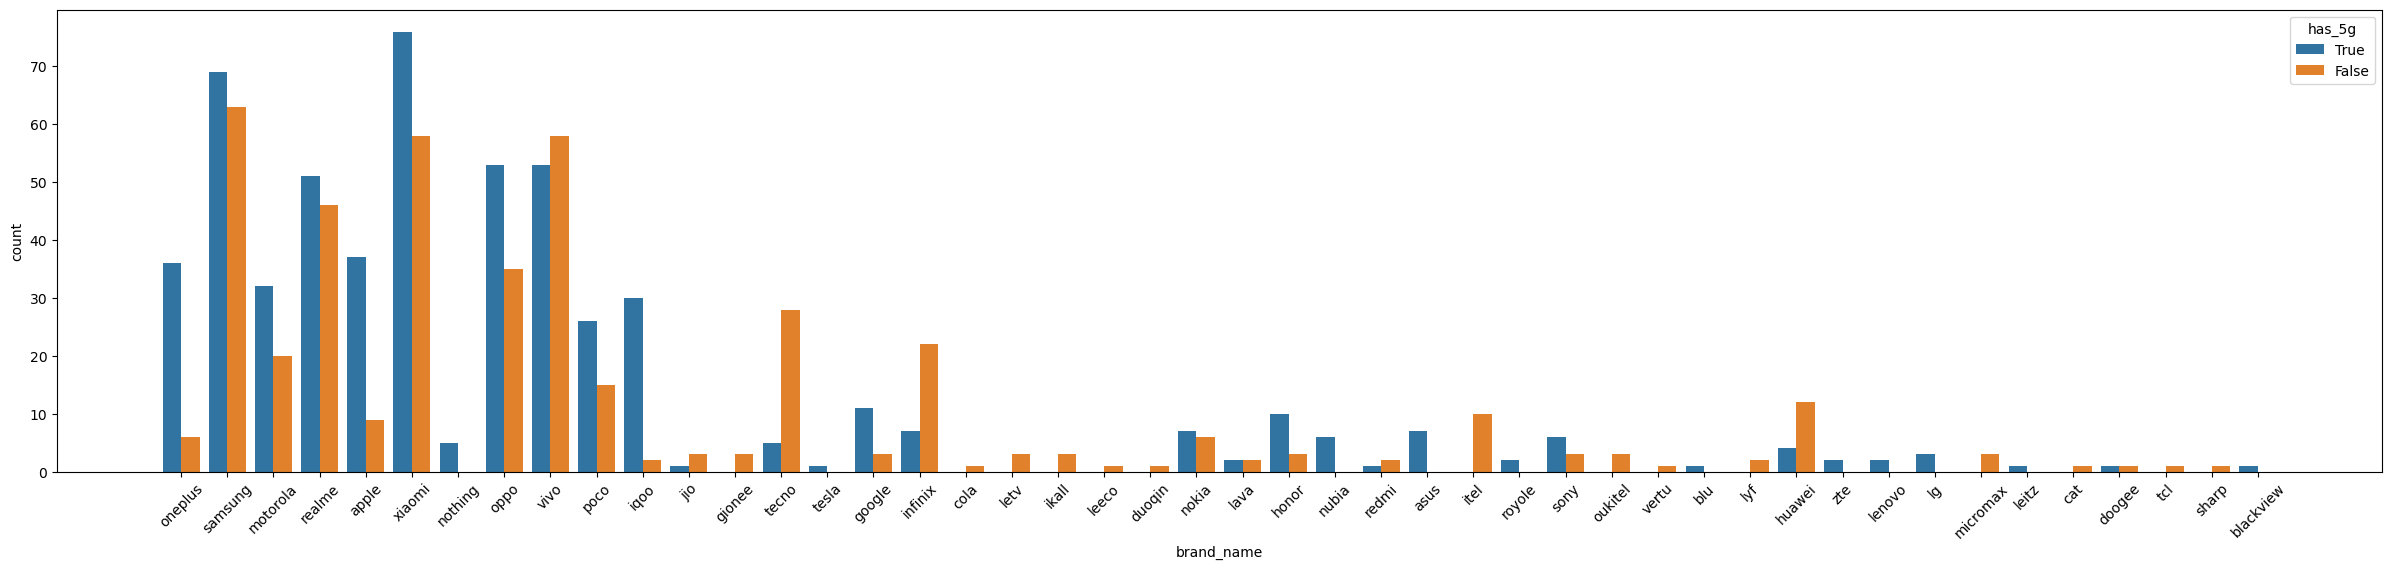

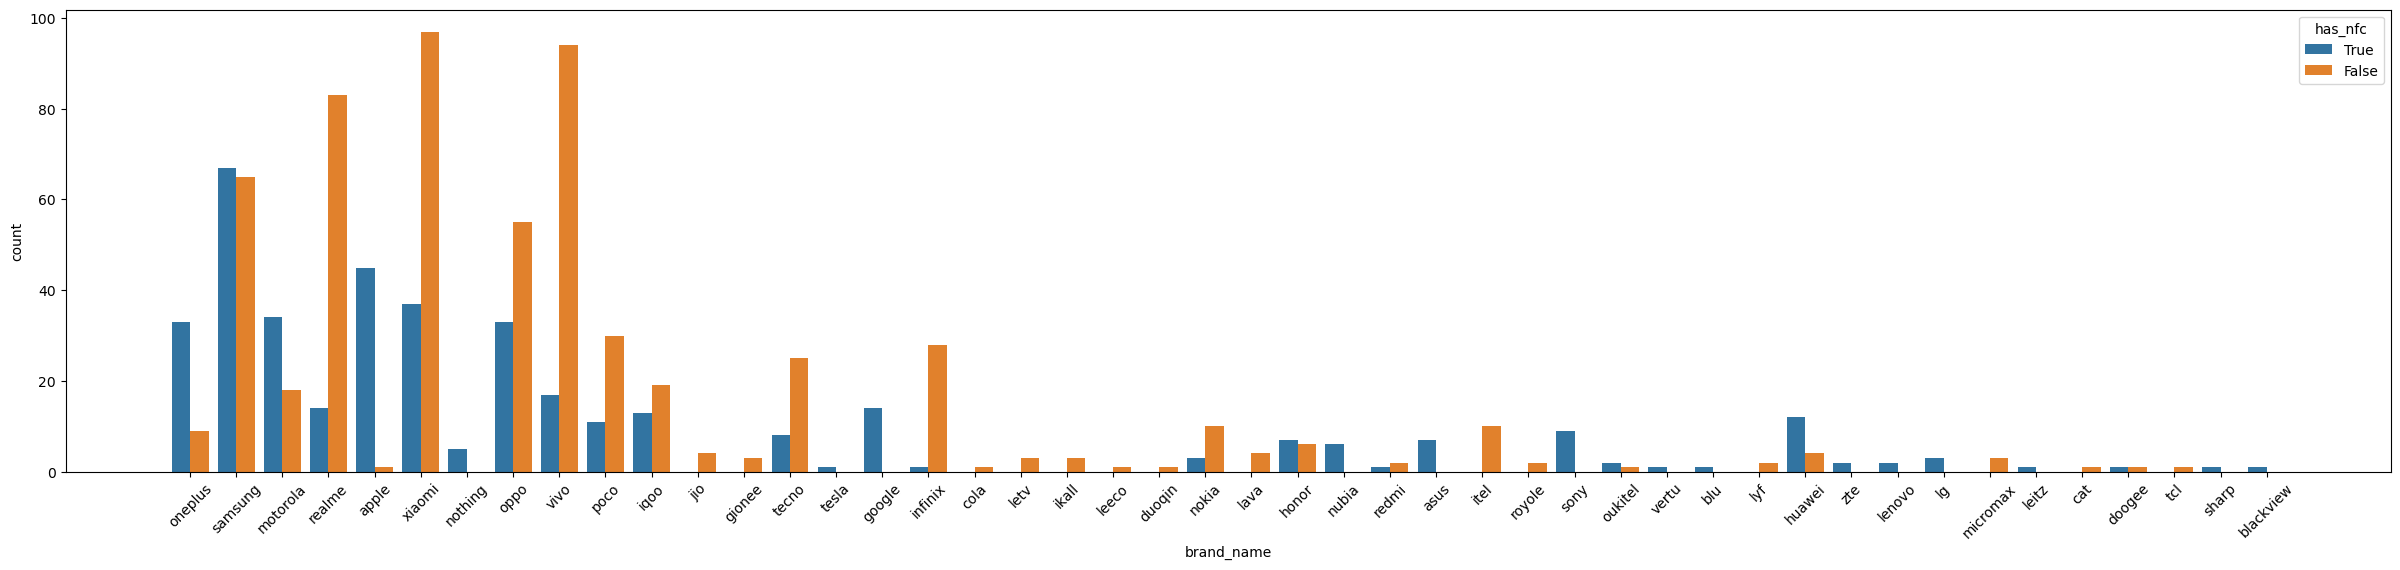

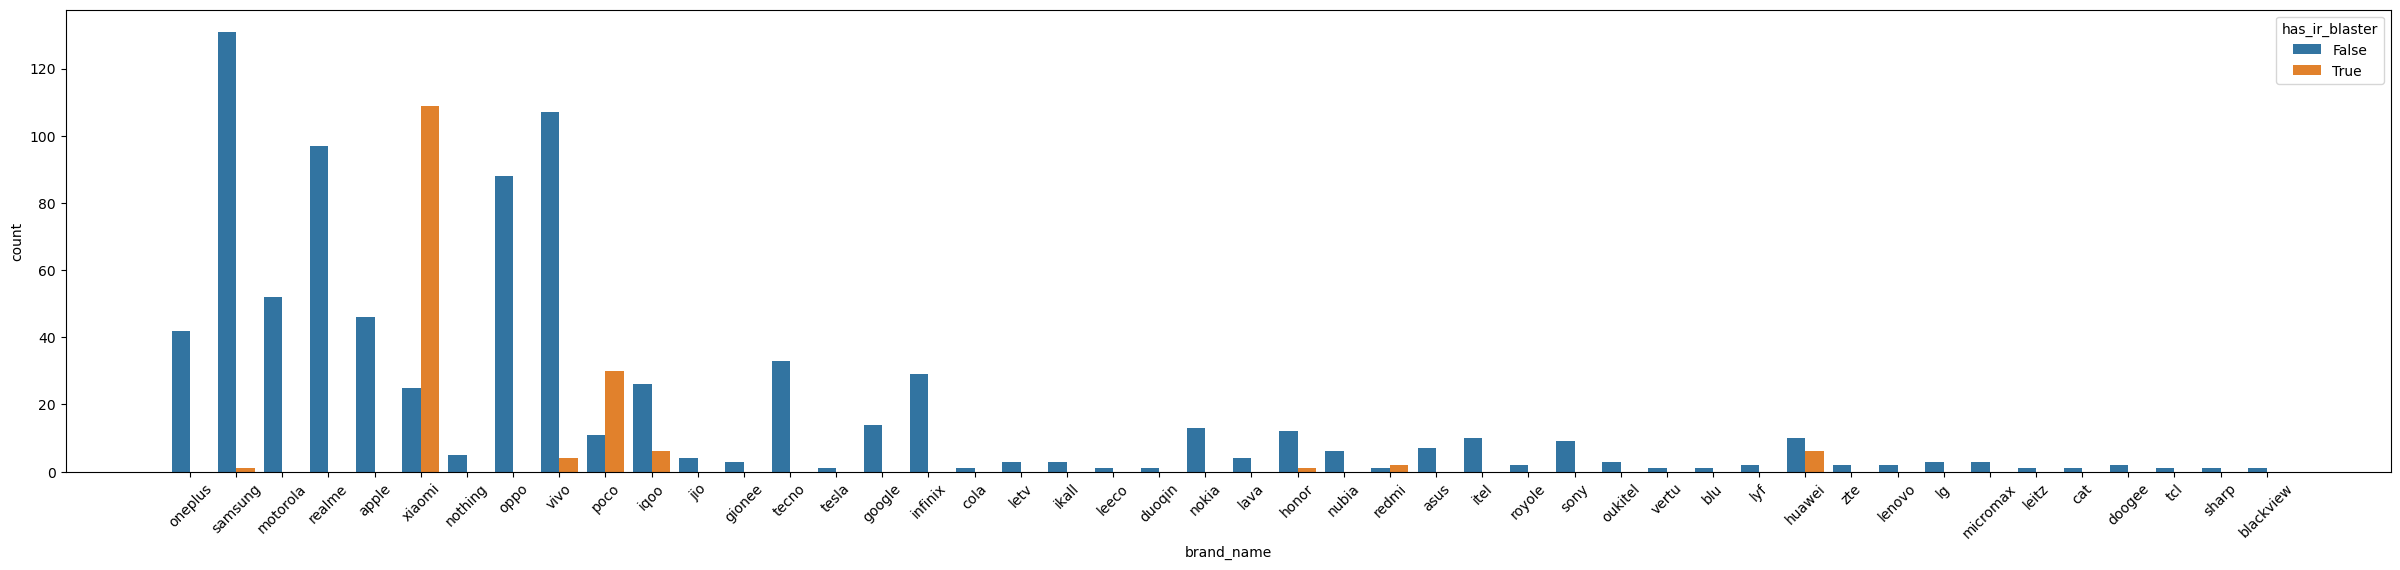

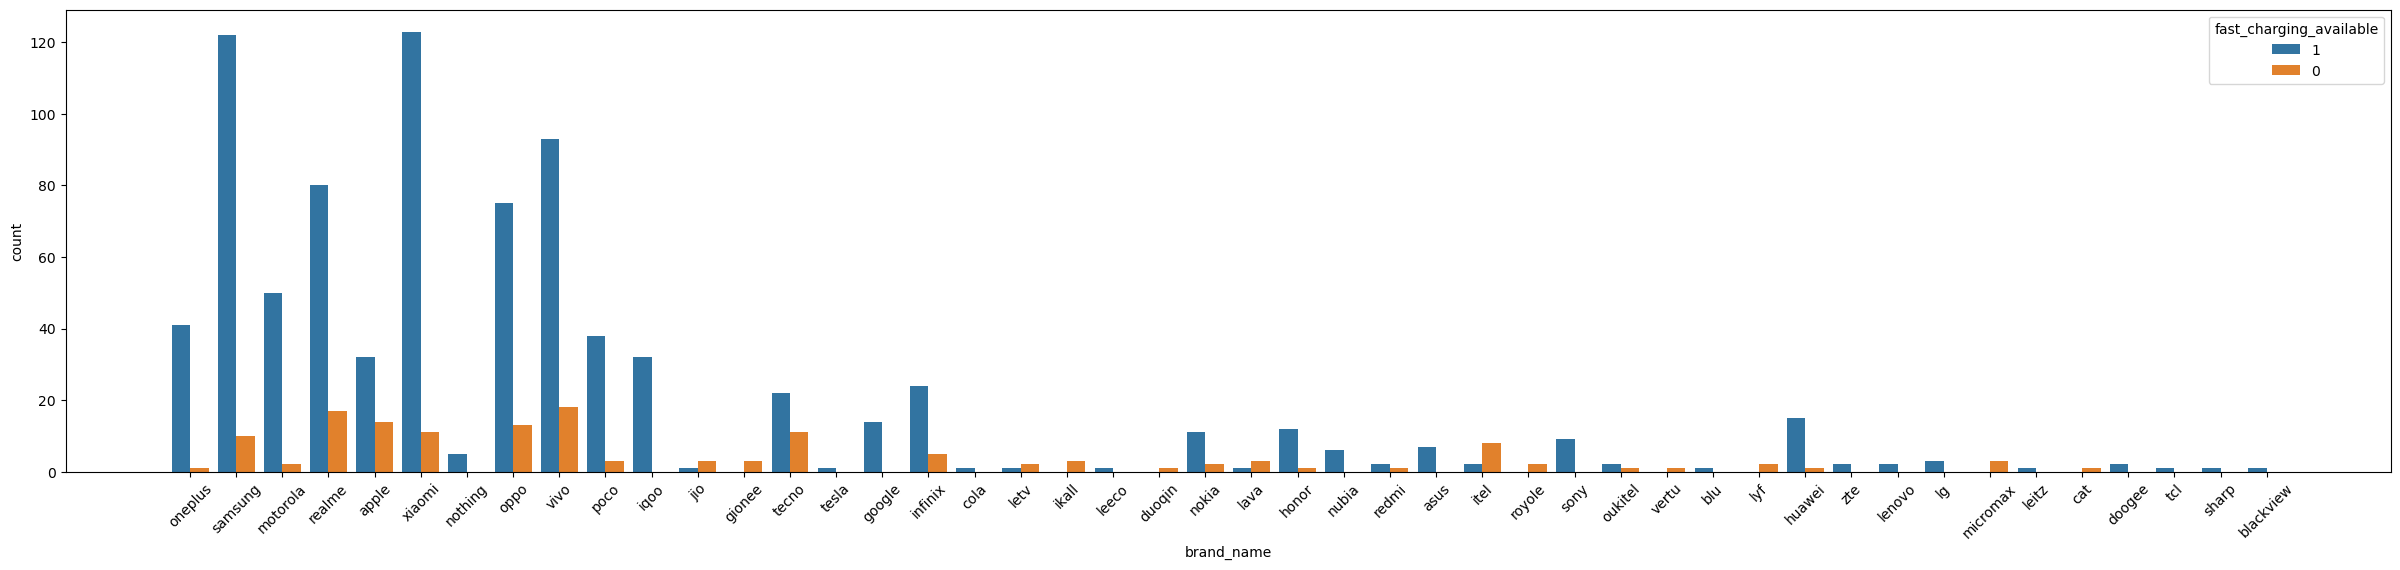

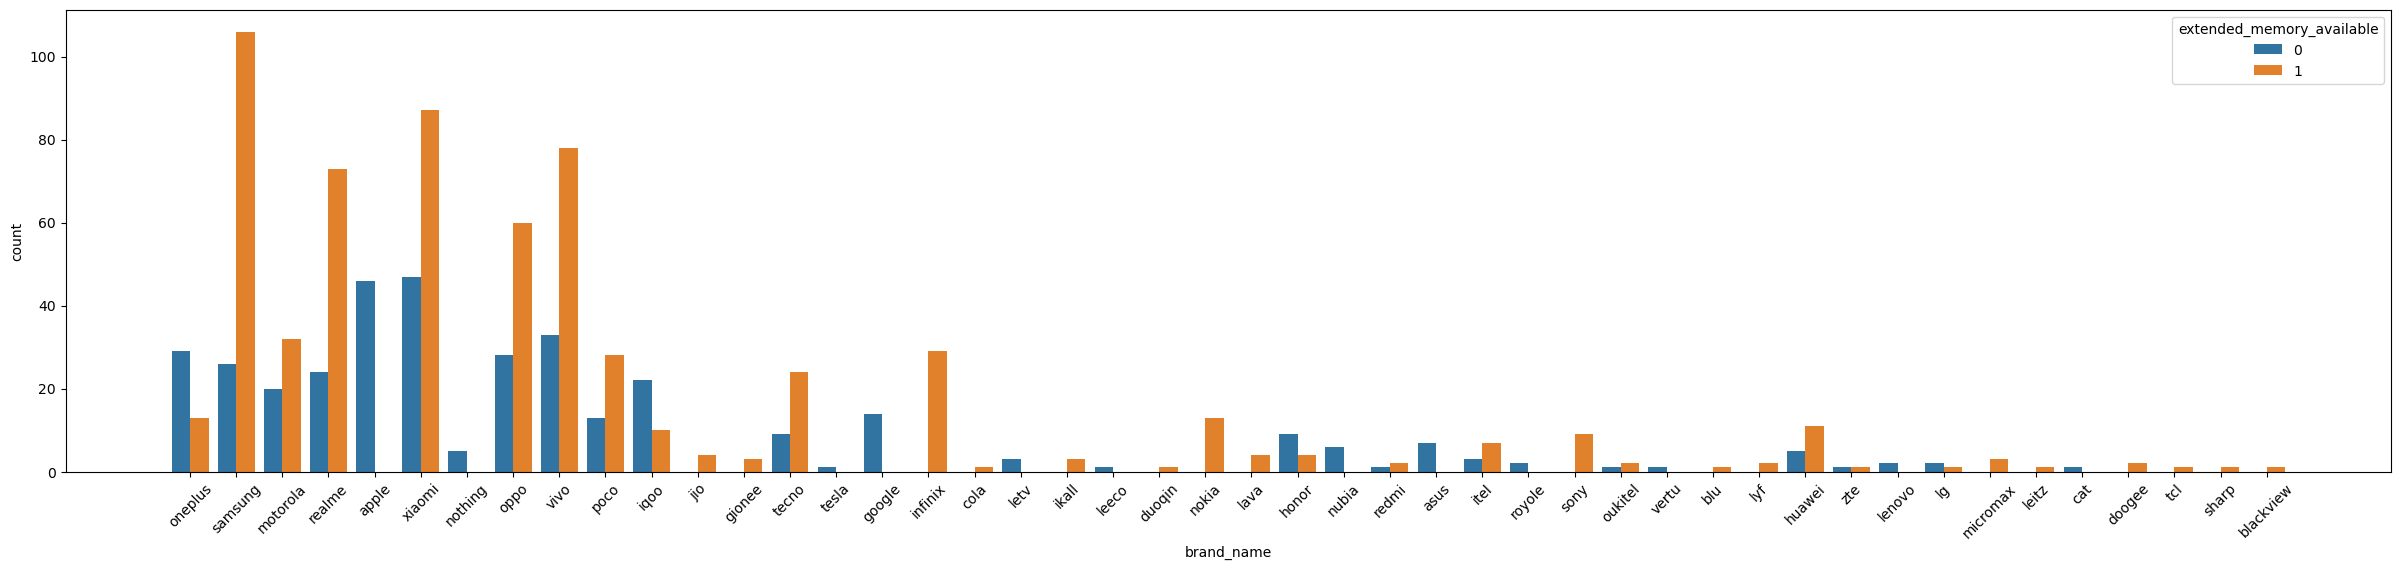

In [74]:
for i in ['has_5g', 'has_nfc', 'has_ir_blaster','fast_charging_available','extended_memory_available']:
    plt.figure(figsize=(30,6))
    sns.countplot(data=df,x='brand_name',hue=df[i].astype(str))
    plt.xticks(rotation=45)
    plt.plot();

In [75]:
df.select_dtypes(include='number').columns

Index(['price', 'rating', 'num_cores', 'processor_speed', 'battery_capacity',
       'fast_charging_available', 'fast_charging', 'ram_capacity',
       'internal_memory', 'screen_size', 'refresh_rate', 'num_rear_cameras',
       'num_front_cameras', 'primary_camera_rear', 'primary_camera_front',
       'extended_memory_available', 'extended_upto', 'resolution_width',
       'resolution_height'],
      dtype='object')

In [76]:
df.select_dtypes(exclude='number').columns

Index(['brand_name', 'has_5g', 'has_nfc', 'has_ir_blaster', 'processor_brand',
       'os'],
      dtype='object')

In [77]:
df[['has_5g', 'has_nfc', 'has_ir_blaster']] = df[['has_5g', 'has_nfc', 'has_ir_blaster']].astype(int)

In [78]:
df.select_dtypes(exclude='number').columns

Index(['brand_name', 'processor_brand', 'os'], dtype='object')

In [79]:
y = df['price']
x = df.drop(columns='price')

In [80]:
x = pd.get_dummies(x)

In [97]:
models = [LinearRegression(),DecisionTreeRegressor(criterion='squared_error',max_depth=10,min_samples_split=5),
         BaggingRegressor(n_estimators=100,estimator=DecisionTreeRegressor(criterion='squared_error',max_depth=10,min_samples_split=5),max_samples=0.6,max_features=0.6),
         RandomForestRegressor(n_estimators=100,max_depth=10,min_samples_split=5,max_samples=0.6,max_features=0.6),
         AdaBoostRegressor(),KNeighborsRegressor(),SVR()]

In [99]:
for mod in models:
    print(mod)
    scores = cross_val_score(estimator=mod,X=x,y=y,cv=KFold(5),n_jobs=-1)
    print(scores)
    print(f'mean of the scores: {scores.mean()}')
    print('---'*20)

LinearRegression()
[0.70686403 0.79025097 0.1580723  0.79077406 0.38967999]
mean of the scores: 0.5671282675142624
------------------------------------------------------------
DecisionTreeRegressor(max_depth=10, min_samples_split=5)
[ 0.66883642 -0.40990365  0.18044865  0.75023675  0.38068337]
mean of the scores: 0.314060309027194
------------------------------------------------------------
BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=10,
                                                 min_samples_split=5),
                 max_features=0.6, max_samples=0.6, n_estimators=100)
[0.88761851 0.90181719 0.24893518 0.85246017 0.44295682]
mean of the scores: 0.6667575730786177
------------------------------------------------------------
RandomForestRegressor(max_depth=10, max_features=0.6, max_samples=0.6,
                      min_samples_split=5)
[0.87355965 0.89266994 0.24330123 0.86752201 0.45887801]
mean of the scores: 0.6671861668630227
-----------------------------------

In [100]:
log_y = np.log(y)

In [101]:
for mod in models:
    print(mod)
    scores = cross_val_score(estimator=mod,X=x,y=log_y,cv=KFold(5),n_jobs=-1)
    print(scores)
    print(f'mean of the scores: {scores.mean()}')
    print('---'*20)

LinearRegression()
[0.86202865 0.90184949 0.73636121 0.89064008 0.80898544]
mean of the scores: 0.8399729735299349
------------------------------------------------------------
DecisionTreeRegressor(max_depth=10, min_samples_split=5)
[0.84695566 0.858081   0.64160879 0.79067229 0.75093118]
mean of the scores: 0.777649782497511
------------------------------------------------------------
BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=10,
                                                 min_samples_split=5),
                 max_features=0.6, max_samples=0.6, n_estimators=100)
[0.91273821 0.91424939 0.7756448  0.90687645 0.85121506]
mean of the scores: 0.8721447809875972
------------------------------------------------------------
RandomForestRegressor(max_depth=10, max_features=0.6, max_samples=0.6,
                      min_samples_split=5)
[0.90856957 0.91319876 0.78556237 0.90276019 0.8452776 ]
mean of the scores: 0.8710736959701961
----------------------------------------

In [102]:
sqrt_y = np.sqrt(y)

In [103]:
for mod in models:
    print(mod)
    scores = cross_val_score(estimator=mod,X=x,y=sqrt_y,cv=KFold(5),n_jobs=-1)
    print(scores)
    print(f'mean of the scores: {scores.mean()}')
    print('---'*20)

LinearRegression()
[0.80850865 0.86218062 0.47601007 0.85241125 0.65210191]
mean of the scores: 0.7302424994471977
------------------------------------------------------------
DecisionTreeRegressor(max_depth=10, min_samples_split=5)
[0.8190667  0.86702713 0.47104389 0.84478323 0.7063944 ]
mean of the scores: 0.741663070602597
------------------------------------------------------------
BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=10,
                                                 min_samples_split=5),
                 max_features=0.6, max_samples=0.6, n_estimators=100)
[0.90950447 0.91151556 0.57704856 0.90616214 0.71005055]
mean of the scores: 0.8028562547107342
------------------------------------------------------------
RandomForestRegressor(max_depth=10, max_features=0.6, max_samples=0.6,
                      min_samples_split=5)
[0.90650576 0.91689959 0.56667906 0.90257293 0.71709701]
mean of the scores: 0.8019508706410171
----------------------------------------

In [104]:
from sklearn.feature_selection import SelectKBest,chi2,f_classif

In [118]:
k20bestchi2 = SelectKBest(chi2,k=20)
k20bestchi2.fit_transform(x,y)

array([[5.00e+03, 1.00e+02, 1.20e+01, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [5.00e+03, 3.30e+01, 6.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [5.00e+03, 1.50e+01, 4.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       ...,
       [5.08e+03, 6.70e+01, 8.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [5.00e+03, 4.39e+01, 6.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [5.00e+03, 2.41e+01, 8.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00]])

In [119]:
best20cols_chi2 = x.columns[k20bestchi2.get_support()]

In [120]:
new_x_chi2 = x[best20cols_chi2]

In [121]:
new_x_chi2

,battery_capacity,fast_charging,ram_capacity,internal_memory,refresh_rate,primary_camera_rear,primary_camera_front,extended_upto,resolution_width,resolution_height,brand_name_itel,brand_name_leitz,brand_name_lyf,brand_name_royole,brand_name_vertu,processor_brand_fusion,processor_brand_google,processor_brand_mediatek,processor_brand_spreadtrum,os_ios
0,5000.0,100.0,12.0,256.0,120,50.0,16.0,0.0,1440,3216,False,False,False,False,False,False,False,False,False,False
1,5000.0,33.0,6.0,128.0,120,64.0,16.0,1024.0,1080,2412,False,False,False,False,False,False,False,False,False,False
2,5000.0,15.0,4.0,64.0,90,50.0,13.0,1024.0,1080,2408,False,False,False,False,False,False,False,False,False,False
3,5000.0,43.9,6.0,128.0,120,50.0,16.0,1024.0,1080,2400,False,False,False,False,False,False,False,False,False,False
4,5000.0,67.0,6.0,128.0,120,108.0,16.0,0.0,1080,2412,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,5000.0,68.0,8.0,128.0,120,64.0,16.0,0.0,1080,2460,False,False,False,False,False,False,False,False,False,False
976,5000.0,22.0,6.0,128.0,60,48.0,8.0,1024.0,720,1600,False,False,False,False,False,False,False,False,False,False
977,5080.0,67.0,8.0,256.0,144,64.0,16.0,0.0,1080,2460,False,False,False,False,False,False,False,False,False,False
978,5000.0,43.9,6.0,128.0,60,108.0,32.0,1024.0,1080,2400,False,False,False,False,False,False,False,False,False,False


In [122]:
for mod in models:
    print(mod)
    scores = cross_val_score(estimator=mod,X=new_x_chi2,y=sqrt_y,cv=KFold(5),n_jobs=-1)
    print(scores)
    print(f'mean of the scores: {scores.mean()}')
    print('---'*20)

LinearRegression()
[0.75347153 0.78232207 0.47151414 0.76790222 0.63211587]
mean of the scores: 0.6814651636783973
------------------------------------------------------------
DecisionTreeRegressor(max_depth=10, min_samples_split=5)
[0.85668666 0.79440179 0.30554882 0.84126984 0.65320601]
mean of the scores: 0.6902226245012673
------------------------------------------------------------
BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=10,
                                                 min_samples_split=5),
                 max_features=0.6, max_samples=0.6, n_estimators=100)
[0.90164889 0.89463205 0.5415289  0.87461766 0.67811773]
mean of the scores: 0.7781090459487552
------------------------------------------------------------
RandomForestRegressor(max_depth=10, max_features=0.6, max_samples=0.6,
                      min_samples_split=5)
[0.89860139 0.89741813 0.5420849  0.88287149 0.69037091]
mean of the scores: 0.7822693639734695
---------------------------------------

In [123]:
k20bestf = SelectKBest(f_classif,k=20)
k20bestf.fit_transform(x,y)

C:\Users\lohit\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


array([[89.  ,  8.  ,  3.2 , ...,  0.  ,  1.  ,  0.  ],
       [81.  ,  8.  ,  2.2 , ...,  0.  ,  1.  ,  0.  ],
       [75.  ,  8.  ,  2.4 , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [85.  ,  8.  ,  2.85, ...,  0.  ,  1.  ,  0.  ],
       [80.  ,  8.  ,  2.2 , ...,  0.  ,  1.  ,  0.  ],
       [74.  ,  8.  ,  2.05, ...,  0.  ,  1.  ,  0.  ]])

In [124]:
best20cols_f= x.columns[k20bestf.get_support()]

In [125]:
new_x_f = x[best20cols_f]

In [126]:
for mod in models:
    print(mod)
    scores = cross_val_score(estimator=mod,X=new_x_f,y=sqrt_y,cv=KFold(5),n_jobs=-1)
    print(scores)
    print(f'mean of the scores: {scores.mean()}')
    print('---'*20)

LinearRegression()
[0.74751902 0.77862289 0.42702792 0.78141169 0.63862824]
mean of the scores: 0.6746419517269071
------------------------------------------------------------
DecisionTreeRegressor(max_depth=10, min_samples_split=5)
[0.71405774 0.83357148 0.47814685 0.78247887 0.67379439]
mean of the scores: 0.696409863918344
------------------------------------------------------------
BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=10,
                                                 min_samples_split=5),
                 max_features=0.6, max_samples=0.6, n_estimators=100)
[0.8634395  0.86636087 0.52530688 0.85768178 0.71676697]
mean of the scores: 0.7659111984590014
------------------------------------------------------------
RandomForestRegressor(max_depth=10, max_features=0.6, max_samples=0.6,
                      min_samples_split=5)
[0.86112637 0.86903747 0.52905391 0.86256634 0.72853107]
mean of the scores: 0.7700630321516156
----------------------------------------

In [128]:
pca = PCA(n_components=6)
x_pca = pca.fit_transform(x)

In [129]:
x_pca_df = pd.DataFrame(x_pca,columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6'])

In [130]:
for mod in models:
    print(mod)
    scores = cross_val_score(estimator=mod,X=x_pca_df,y=sqrt_y,cv=KFold(5),n_jobs=-1)
    print(scores)
    print(f'mean of the scores: {scores.mean()}')
    print('---'*20)

LinearRegression()
[0.59194357 0.676083   0.41556082 0.71251221 0.5108709 ]
mean of the scores: 0.5813940987929392
------------------------------------------------------------
DecisionTreeRegressor(max_depth=10, min_samples_split=5)
[0.44716197 0.7548847  0.40483292 0.69956135 0.17835167]
mean of the scores: 0.49695852037910077
------------------------------------------------------------
BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=10,
                                                 min_samples_split=5),
                 max_features=0.6, max_samples=0.6, n_estimators=100)
[0.82520839 0.78406248 0.51423252 0.79677673 0.5792255 ]
mean of the scores: 0.6999011239308498
------------------------------------------------------------
RandomForestRegressor(max_depth=10, max_features=0.6, max_samples=0.6,
                      min_samples_split=5)
[0.84917996 0.82601936 0.50249418 0.81603524 0.61905172]
mean of the scores: 0.7225560903376157
--------------------------------------